In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
file_path = '/content/drive/My Drive/TÜ Andmeteadus MSc/Machine Learning I/Project/cgm.txt'
df = pd.read_csv(file_path, sep="|")
df.head()

PtID       Period          DataDtTm  CGM
0     1  1. Baseline  11DEC17:23:59:25  172
1     1  1. Baseline  12DEC17:00:04:24  170
2     1  1. Baseline  12DEC17:00:09:24  167
3     1  1. Baseline  12DEC17:00:14:25  163
4     1  1. Baseline  12DEC17:00:19:25  160

In [5]:
df.head(102)

PtID       Period          DataDtTm  CGM
0       1  1. Baseline  11DEC17:23:59:25  172
1       1  1. Baseline  12DEC17:00:04:24  170
2       1  1. Baseline  12DEC17:00:09:24  167
3       1  1. Baseline  12DEC17:00:14:25  163
4       1  1. Baseline  12DEC17:00:19:25  160
..    ...          ...               ...  ...
97      1  1. Baseline  12DEC17:08:04:24  118
98      1  1. Baseline  12DEC17:08:09:24  117
99      1  1. Baseline  12DEC17:08:14:24  117
100     1  1. Baseline  12DEC17:08:19:24  117
101     1  1. Baseline  12DEC17:08:24:24  117

[102 rows x 4 columns]

In [ ]:
len(df)

9032235

In [6]:
#kuupäeva formaadi veerg
df['DataDtTm'] = pd.to_datetime(df['DataDtTm'], format='%d%b%y:%H:%M:%S')

#Sorteeri kindluse mõttes
df = df.sort_values(['PtID', 'DataDtTm'])

# Arvuta ajavahe järjestikuste mõõtmiste vahel
df['delta_min'] = df.groupby('PtID')['DataDtTm'].diff().dt.total_seconds() / 60

#  Kontrolli tüüpilist sammu
df['delta_min'].describe()


count    9.032067e+06
mean     5.393085e+00
std      3.098620e+02
min      4.500000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      9.275909e+05
Name: delta_min, dtype: float64

In [11]:
# Puuduvad väärtused
df['CGM'].isna().sum()

# Väärtuste vahemik
df['CGM'].describe()

# Eemalda või interpoleeri lüngad
df['CGM_interp'] = df.groupby('PtID')['CGM'].transform(lambda x: x.interpolate(limit=3))

print(df['CGM'].isna().sum())
print(df['CGM'].describe())


0
count    9.032235e+06
mean     1.604207e+02
std      6.120771e+01
min      3.900000e+01
25%      1.160000e+02
50%      1.480000e+02
75%      1.930000e+02
max      4.010000e+02
Name: CGM, dtype: float64


In [9]:
df.head()

PtID       Period            DataDtTm  CGM  delta_min  CGM_interp
0     1  1. Baseline 2017-12-11 23:59:25  172        NaN         172
1     1  1. Baseline 2017-12-12 00:04:24  170   4.983333         170
2     1  1. Baseline 2017-12-12 00:09:24  167   5.000000         167
3     1  1. Baseline 2017-12-12 00:14:25  163   5.016667         163
4     1  1. Baseline 2017-12-12 00:19:25  160   5.000000         160

In [24]:
# Teisendus mg/dL → mmol/L
df['CGM_mmol'] = df['CGM'] / 18

# Märgi, kas väärtus on vahemikus 4–10 mmol/L
df['in_range'] = df['CGM_mmol'].between(4, 10)


In [14]:
def classify_glucose(val):
    if val < 54:
        return 'severe_hypo'
    elif val < 70:
        return 'hypo'
    elif val <= 180:
        return 'in_range'
    elif val <= 250:
        return 'hyper'
    else:
        return 'severe_hyper'

df['CGM_category'] = df['CGM_interp'].apply(classify_glucose)


In [25]:
df.head(100)

PtID       Period            DataDtTm  CGM  delta_min  CGM_interp  \
0      1  1. Baseline 2017-12-11 23:59:25  172        NaN         172   
1      1  1. Baseline 2017-12-12 00:04:24  170   4.983333         170   
2      1  1. Baseline 2017-12-12 00:09:24  167   5.000000         167   
3      1  1. Baseline 2017-12-12 00:14:25  163   5.016667         163   
4      1  1. Baseline 2017-12-12 00:19:25  160   5.000000         160   
..   ...          ...                 ...  ...        ...         ...   
95     1  1. Baseline 2017-12-12 07:54:24  124   5.000000         124   
96     1  1. Baseline 2017-12-12 07:59:24  120   5.000000         120   
97     1  1. Baseline 2017-12-12 08:04:24  118   5.000000         118   
98     1  1. Baseline 2017-12-12 08:09:24  117   5.000000         117   
99     1  1. Baseline 2017-12-12 08:14:24  117   5.000000         117   

   CGM_category        date  CGM_mmol  in_range  
0      in_range  2017-12-11  9.555556      True  
1      in_range  2017-12-12  9.444444      True  
2      in_range  2017-12-12  9.277778      True  
3      in_range  2017-12-12  9.055556      True  
4      in_range  2017-12-12  8.888889      True  
..          ...         ...       ...       ...  
95     in_range  2017-12-12  6.888889      True  
96     in_range  2017-12-12  6.666667      True  
97     in_range  2017-12-12  6.555556      True  
98     in_range  2017-12-12  6.500000      True  
99     in_range  2017-12-12  6.500000      True  

[100 rows x 10 columns]

In [ ]:
#in range 49.5% -> peab rohkem olema

In [26]:
pt = 1
subset = df[df['PtID'] == pt]

TIR = subset['in_range'].mean() * 100
print(f"Patsiendi {pt} Time in Range: {TIR:.1f}%")


Patsiendi 1 Time in Range: 49.5%


In [ ]:
#in range 69.90% -> peab rohkem olema

In [28]:
pt = 4
subset = df[df['PtID'] == pt]

TIR = subset['in_range'].mean() * 100
print(f"Patsiendi {pt} Time in Range: {TIR:.1f}%")


Patsiendi 4 Time in Range: 69.9%


In [ ]:
#in range 72.8% -> ok

In [33]:
pt = 8
subset = df[df['PtID'] == pt]

TIR = subset['in_range'].mean() * 100
print(f"Patsiendi {pt} Time in Range: {TIR:.1f}%")


Patsiendi 8 Time in Range: 72.8%


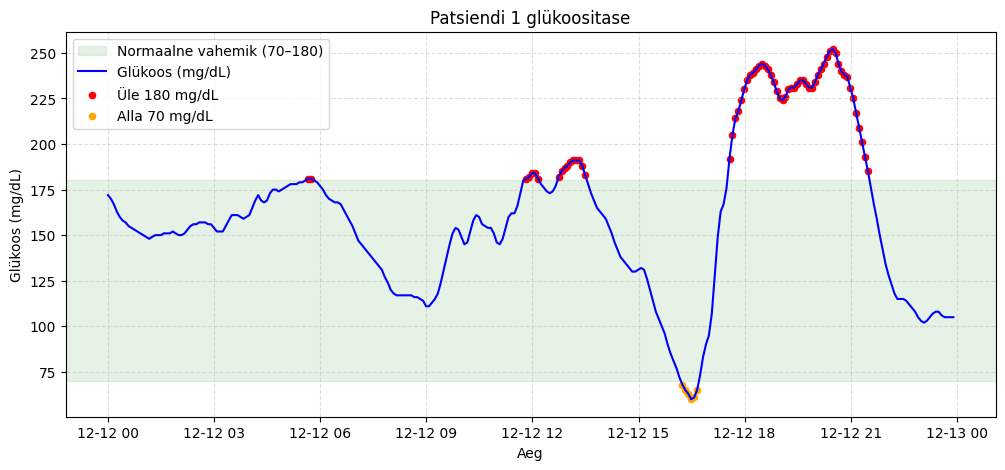

In [17]:
pt = 1
subset = df[df['PtID'] == pt].iloc[:288]  # umbes 1 päev (5-min sammuga)

plt.figure(figsize=(12,5))

# --- toonitud tsoonid (70–180 mg/dL normaalne vahemik)
plt.axhspan(70, 180, color='green', alpha=0.1, label='Normaalne vahemik (70–180)')

# --- joon
plt.plot(subset['DataDtTm'], subset['CGM'], color='blue', label='Glükoos (mg/dL)')

# --- punased punktid: liiga kõrge
plt.scatter(subset['DataDtTm'][subset['CGM'] > 180],
            subset['CGM'][subset['CGM'] > 180],
            color='red', s=20, label='Üle 180 mg/dL')

# --- oranžid punktid: liiga madal
plt.scatter(subset['DataDtTm'][subset['CGM'] < 70],
            subset['CGM'][subset['CGM'] < 70],
            color='orange', s=20, label='Alla 70 mg/dL')

# --- graafiku sätted
plt.title(f'Patsiendi {pt} glükoositase')
plt.xlabel('Aeg')
plt.ylabel('Glükoos (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


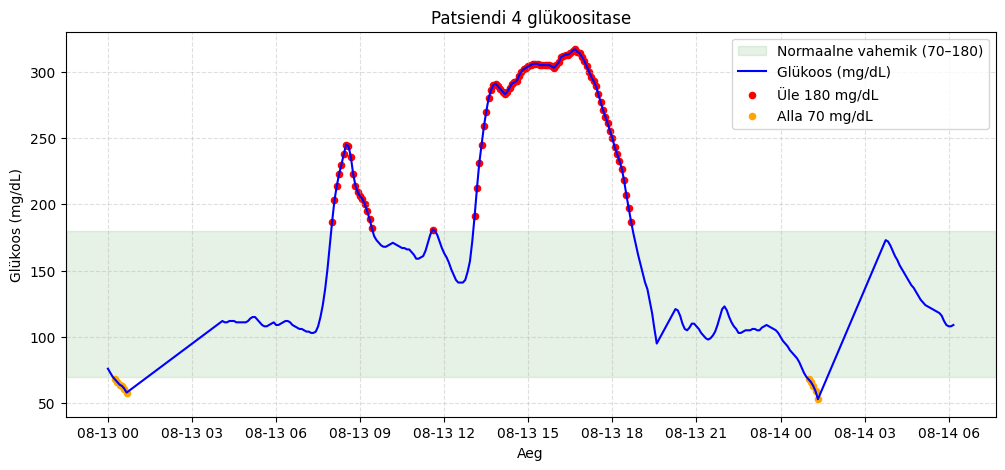

In [34]:
pt = 4
subset = df[df['PtID'] == pt].iloc[:288]  # umbes 1 päev (5-min sammuga)

plt.figure(figsize=(12,5))

# --- toonitud tsoonid (70–180 mg/dL normaalne vahemik)
plt.axhspan(70, 180, color='green', alpha=0.1, label='Normaalne vahemik (70–180)')

# --- joon
plt.plot(subset['DataDtTm'], subset['CGM'], color='blue', label='Glükoos (mg/dL)')

# --- punased punktid: liiga kõrge
plt.scatter(subset['DataDtTm'][subset['CGM'] > 180],
            subset['CGM'][subset['CGM'] > 180],
            color='red', s=20, label='Üle 180 mg/dL')

# --- oranžid punktid: liiga madal
plt.scatter(subset['DataDtTm'][subset['CGM'] < 70],
            subset['CGM'][subset['CGM'] < 70],
            color='orange', s=20, label='Alla 70 mg/dL')

# --- graafiku sätted
plt.title(f'Patsiendi {pt} glükoositase')
plt.xlabel('Aeg')
plt.ylabel('Glükoos (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


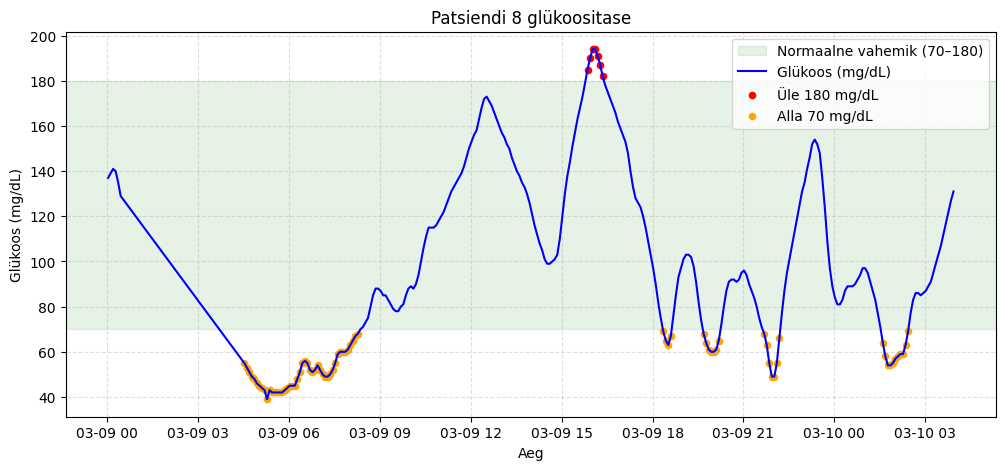

In [35]:
pt = 8
subset = df[df['PtID'] == pt].iloc[:288]  # umbes 1 päev (5-min sammuga)

plt.figure(figsize=(12,5))

# --- toonitud tsoonid (70–180 mg/dL normaalne vahemik)
plt.axhspan(70, 180, color='green', alpha=0.1, label='Normaalne vahemik (70–180)')

# --- joon
plt.plot(subset['DataDtTm'], subset['CGM'], color='blue', label='Glükoos (mg/dL)')

# --- punased punktid: liiga kõrge
plt.scatter(subset['DataDtTm'][subset['CGM'] > 180],
            subset['CGM'][subset['CGM'] > 180],
            color='red', s=20, label='Üle 180 mg/dL')

# --- oranžid punktid: liiga madal
plt.scatter(subset['DataDtTm'][subset['CGM'] < 70],
            subset['CGM'][subset['CGM'] < 70],
            color='orange', s=20, label='Alla 70 mg/dL')

# --- graafiku sätted
plt.title(f'Patsiendi {pt} glükoositase')
plt.xlabel('Aeg')
plt.ylabel('Glükoos (mg/dL)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


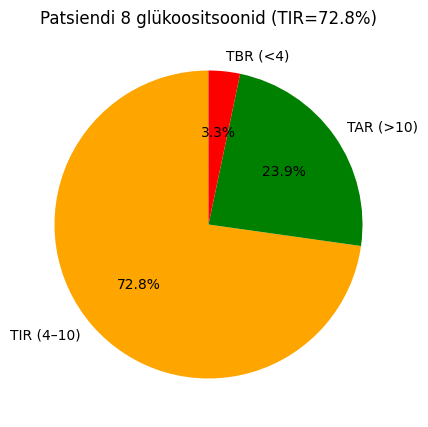

In [40]:
import numpy as np
pt = 8

subset = df[df['PtID'] == pt].copy()
subset['CGM_mmol'] = subset['CGM'] / 18

subset['zone'] = np.select(
    [subset['CGM_mmol'] < 4,
     subset['CGM_mmol'].between(4, 10),
     subset['CGM_mmol'] > 10],
    ['TBR (<4)', 'TIR (4–10)', 'TAR (>10)'],
    default='missing'
).astype(object)

counts = subset['zone'].value_counts(normalize=True) * 100

plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%',
        colors=['orange','green','red','gray'], startangle=90)
plt.title(f'Patsiendi {pt} glükoositsoonid (TIR={counts.get("TIR (4–10)", 0):.1f}%)')
plt.show()


In [20]:
df['date'] = df['DataDtTm'].dt.date
daily = df.groupby(['PtID', 'date'])['CGM'].agg(['mean', 'std', 'min', 'max'])


In [21]:
df.head()

PtID       Period            DataDtTm  CGM  delta_min  CGM_interp  \
0     1  1. Baseline 2017-12-11 23:59:25  172        NaN         172   
1     1  1. Baseline 2017-12-12 00:04:24  170   4.983333         170   
2     1  1. Baseline 2017-12-12 00:09:24  167   5.000000         167   
3     1  1. Baseline 2017-12-12 00:14:25  163   5.016667         163   
4     1  1. Baseline 2017-12-12 00:19:25  160   5.000000         160   

  CGM_category        date  
0     in_range  2017-12-11  
1     in_range  2017-12-12  
2     in_range  2017-12-12  
3     in_range  2017-12-12  
4     in_range  2017-12-12

In [ ]:
#ISOLATIONFOREST

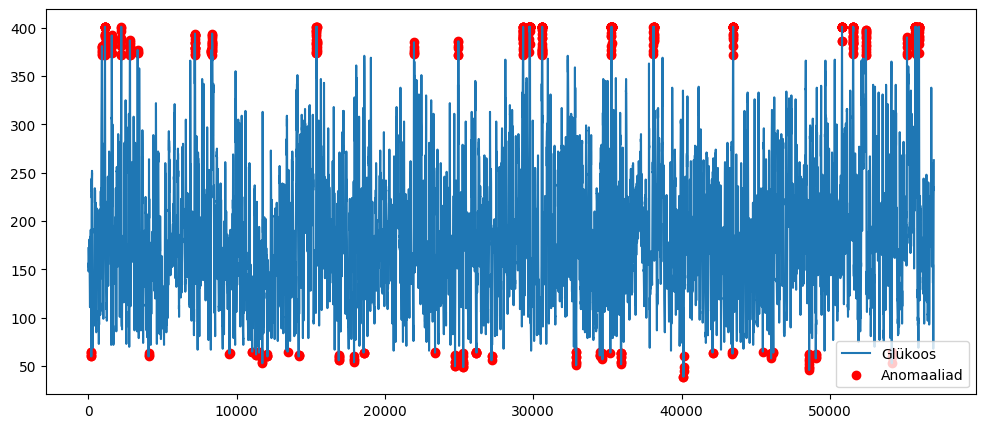

In [22]:
from sklearn.ensemble import IsolationForest

pt_df = df[df['PtID'] == 1][['CGM']].copy()
model = IsolationForest(contamination=0.01, random_state=42)
pt_df['anomaly'] = model.fit_predict(pt_df[['CGM']])

plt.figure(figsize=(12,5))
plt.plot(pt_df['CGM'], label='Glükoos')
plt.scatter(pt_df.index[pt_df['anomaly']==-1], pt_df['CGM'][pt_df['anomaly']==-1], color='red', label='Anomaaliad')
plt.legend()
plt.show()


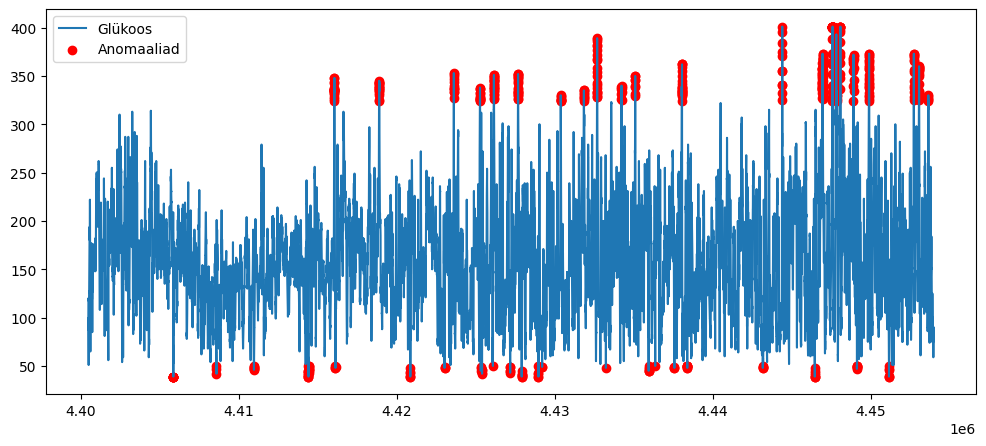

In [23]:
from sklearn.ensemble import IsolationForest

pt_df = df[df['PtID'] == 2][['CGM']].copy()
model = IsolationForest(contamination=0.01, random_state=42)
pt_df['anomaly'] = model.fit_predict(pt_df[['CGM']])

plt.figure(figsize=(12,5))
plt.plot(pt_df['CGM'], label='Glükoos')
plt.scatter(pt_df.index[pt_df['anomaly']==-1], pt_df['CGM'][pt_df['anomaly']==-1], color='red', label='Anomaaliad')
plt.legend()
plt.show()


In [41]:
df['CGM_diff'] = df['CGM_interp'].diff()
df['rolling_mean'] = df['CGM_interp'].rolling(window=6, min_periods=1).mean()
df['rolling_std'] = df['CGM_interp'].rolling(window=6, min_periods=1).std()
df['hour'] = df['DataDtTm'].dt.hour
df['delta_from_mean'] = df['CGM_interp'] - df['rolling_mean']


In [42]:
df.head()

PtID       Period            DataDtTm  CGM  delta_min  CGM_interp  \
0     1  1. Baseline 2017-12-11 23:59:25  172        NaN         172   
1     1  1. Baseline 2017-12-12 00:04:24  170   4.983333         170   
2     1  1. Baseline 2017-12-12 00:09:24  167   5.000000         167   
3     1  1. Baseline 2017-12-12 00:14:25  163   5.016667         163   
4     1  1. Baseline 2017-12-12 00:19:25  160   5.000000         160   

  CGM_category        date  CGM_mmol  in_range  CGM_diff  rolling_mean  \
0     in_range  2017-12-11  9.555556      True       NaN    172.000000   
1     in_range  2017-12-12  9.444444      True      -2.0    171.000000   
2     in_range  2017-12-12  9.277778      True      -3.0    169.666667   
3     in_range  2017-12-12  9.055556      True      -4.0    168.000000   
4     in_range  2017-12-12  8.888889      True      -3.0    166.400000   

   rolling_std  hour  delta_from_mean  
0          NaN    23         0.000000  
1     1.414214     0        -1.000000  
2     2.516611     0        -2.666667  
3     3.915780     0        -5.000000  
4     4.929503     0        -6.400000

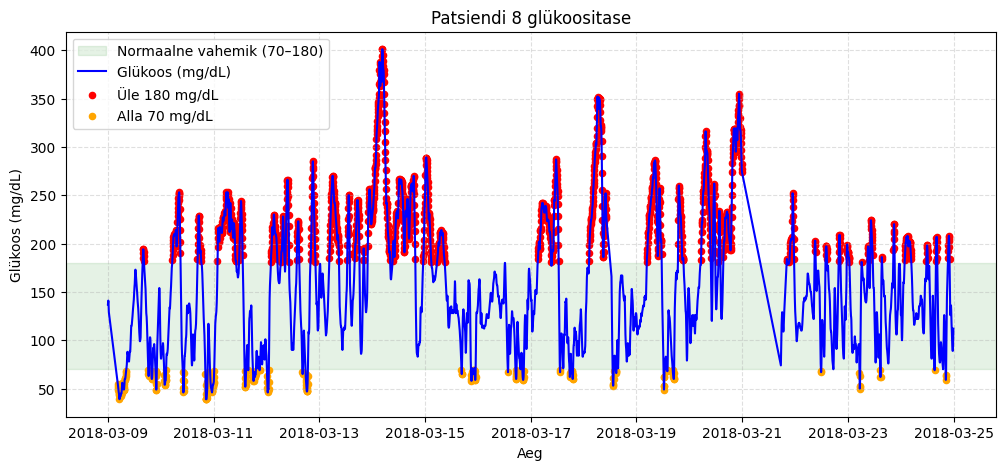

hour
0      7.471264
1      4.166667
2      3.571429
3      0.000000
4      3.448276
5      9.444444
6      6.666667
7      6.666667
8      2.222222
9      0.000000
10     4.624277
11     1.190476
12     2.906977
13     6.666667
14    10.000000
15     1.111111
16     6.666667
17     8.108108
18    17.187500
19     5.208333
20    14.062500
21     9.375000
22    10.416667
23     6.250000
Name: is_low, dtype: float64


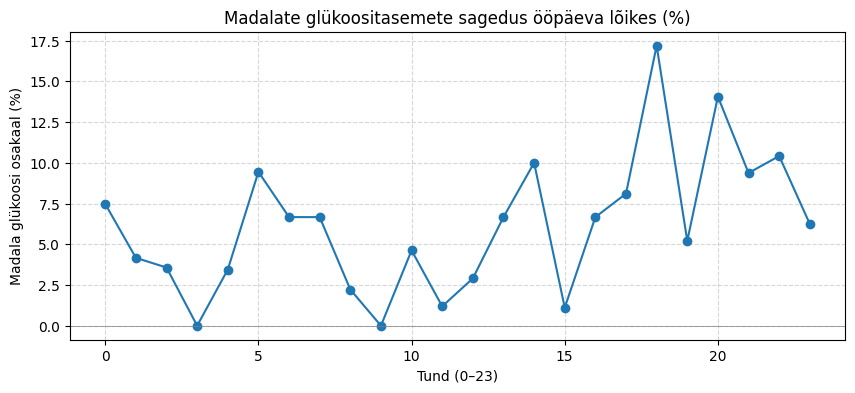

In [65]:
#sisesta patsiendi id
pt = 8

df['DataDtTm'] = pd.to_datetime(df['DataDtTm'], format='%d%b%y:%H:%M:%S')

#sisesta kuupäeva vahemik millal tahad tulemusi vaadata
start_date = '2018-03-09'
end_date = '2018-03-25'

#teeme subseti, kus võtame patseindi id ja kuupäevade järgi andmed
subset = df[
    (df['PtID'] == pt) &
    (df['DataDtTm'].between(start_date, end_date))
].copy()

#arvutused
subset['CGM_mmol'] = subset['CGM'] / 18
subset['date'] = subset['DataDtTm'].dt.date
subset['hour'] = subset['DataDtTm'].dt.hour
subset['minute'] = subset['DataDtTm'].dt.minute
subset['time_of_day'] = subset['hour'] + subset['minute']/60
subset['is_low'] = subset['CGM'] < 70  # või subset['CGM_mmol'] < 3.9


if subset.empty:
    print(f"Patsiendil {pt} pole andmeid vahemikus {start_date}–{end_date}.")
else:
  plt.figure(figsize=(12,5))

  # toonitud tsoonid (70–180 mg/dL norm vahemik)
  plt.axhspan(70, 180, color='green', alpha=0.1, label='Normaalne vahemik (70–180)')

  # joon
  plt.plot(subset['DataDtTm'], subset['CGM'], color='blue', label='Glükoos (mg/dL)')

  # punased punktid: liiga kõrge
  plt.scatter(subset['DataDtTm'][subset['CGM'] > 180],
              subset['CGM'][subset['CGM'] > 180],
              color='red', s=20, label='Üle 180 mg/dL')

  # oranžid punktid: liiga madal
  plt.scatter(subset['DataDtTm'][subset['CGM'] < 70],
              subset['CGM'][subset['CGM'] < 70],
              color='orange', s=20, label='Alla 70 mg/dL')

  plt.title(f'Patsiendi {pt} glükoositase')
  plt.xlabel('Aeg')
  plt.ylabel('Glükoos (mg/dL)')
  plt.legend()
  plt.grid(True, linestyle='--', alpha=0.4)
  plt.show()

# mitu korda tunnis on väärtus madal
hourly_low = (
    subset.groupby('hour')['is_low']
    .mean() * 100  # protsent tunnis
)
print(hourly_low)

plt.figure(figsize=(10,4))
plt.plot(hourly_low.index, hourly_low.values, marker='o')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title('Madalate glükoositasemete sagedus ööpäeva lõikes (%)')
plt.xlabel('Tund (0–23)')
plt.ylabel('Madala glükoosi osakaal (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


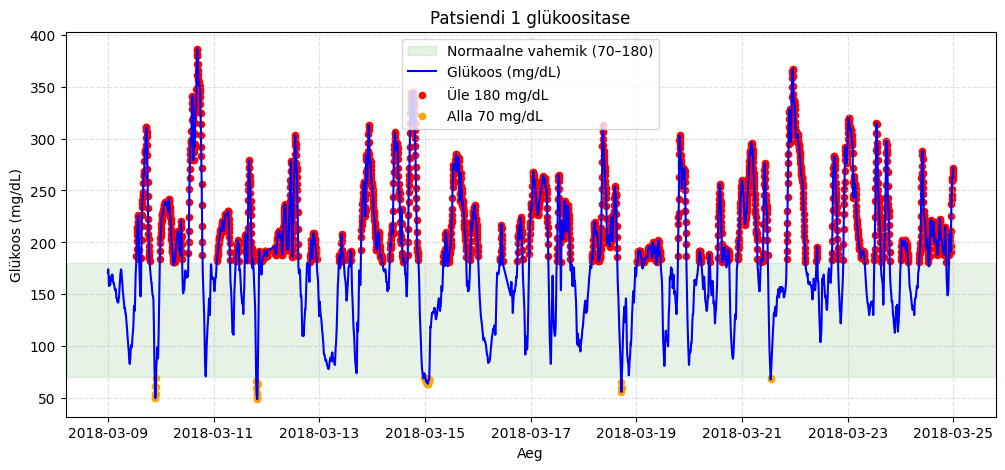

hour
0     4.812834
1     6.111111
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.555556
13    0.555556
14    0.000000
15    0.000000
16    0.000000
17    2.083333
18    0.000000
19    4.166667
20    0.520833
21    3.645833
22    0.000000
23    0.520833
Name: is_low, dtype: float64


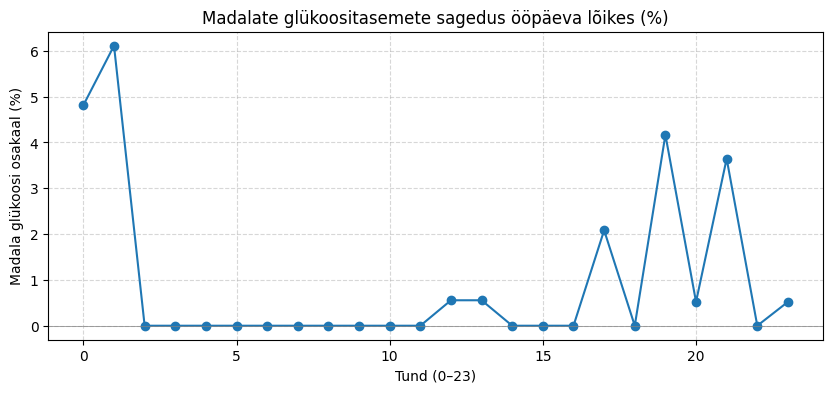

In [66]:
#sisesta patsiendi id
pt = 1

df['DataDtTm'] = pd.to_datetime(df['DataDtTm'], format='%d%b%y:%H:%M:%S')

#sisesta kuupäeva vahemik millal tahad tulemusi vaadata
start_date = '2018-03-09'
end_date = '2018-03-25'

#teeme subseti, kus võtame patseindi id ja kuupäevade järgi andmed
subset = df[
    (df['PtID'] == pt) &
    (df['DataDtTm'].between(start_date, end_date))
].copy()

#arvutused
subset['CGM_mmol'] = subset['CGM'] / 18
subset['date'] = subset['DataDtTm'].dt.date
subset['hour'] = subset['DataDtTm'].dt.hour
subset['minute'] = subset['DataDtTm'].dt.minute
subset['time_of_day'] = subset['hour'] + subset['minute']/60
subset['is_low'] = subset['CGM'] < 70  # või subset['CGM_mmol'] < 3.9


if subset.empty:
    print(f"Patsiendil {pt} pole andmeid vahemikus {start_date}–{end_date}.")
else:
  plt.figure(figsize=(12,5))

  # toonitud tsoonid (70–180 mg/dL norm vahemik)
  plt.axhspan(70, 180, color='green', alpha=0.1, label='Normaalne vahemik (70–180)')

  # joon
  plt.plot(subset['DataDtTm'], subset['CGM'], color='blue', label='Glükoos (mg/dL)')

  # punased punktid: liiga kõrge
  plt.scatter(subset['DataDtTm'][subset['CGM'] > 180],
              subset['CGM'][subset['CGM'] > 180],
              color='red', s=20, label='Üle 180 mg/dL')

  # oranžid punktid: liiga madal
  plt.scatter(subset['DataDtTm'][subset['CGM'] < 70],
              subset['CGM'][subset['CGM'] < 70],
              color='orange', s=20, label='Alla 70 mg/dL')

  plt.title(f'Patsiendi {pt} glükoositase')
  plt.xlabel('Aeg')
  plt.ylabel('Glükoos (mg/dL)')
  plt.legend()
  plt.grid(True, linestyle='--', alpha=0.4)
  plt.show()

# mitu korda tunnis on väärtus madal
hourly_low = (
    subset.groupby('hour')['is_low']
    .mean() * 100  # protsent tunnis
)
print(hourly_low)

plt.figure(figsize=(10,4))
plt.plot(hourly_low.index, hourly_low.values, marker='o')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title('Madalate glükoositasemete sagedus ööpäeva lõikes (%)')
plt.xlabel('Tund (0–23)')
plt.ylabel('Madala glükoosi osakaal (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Patsiendil 0 pole andmeid vahemikus 2018-03-09–2018-03-25.
Series([], Name: is_low, dtype: float64)


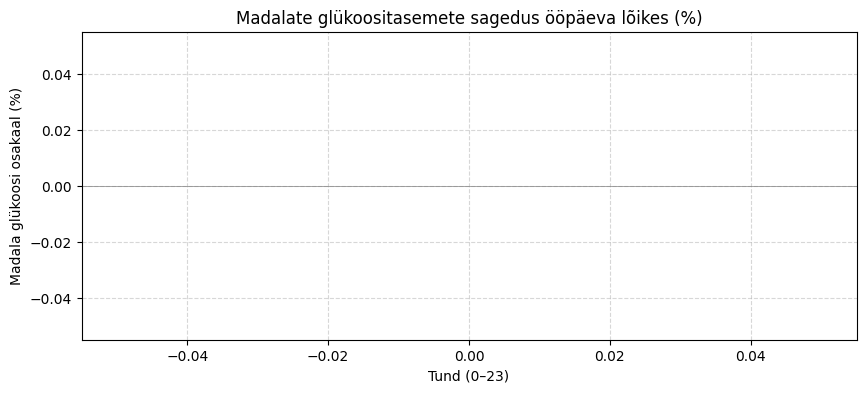

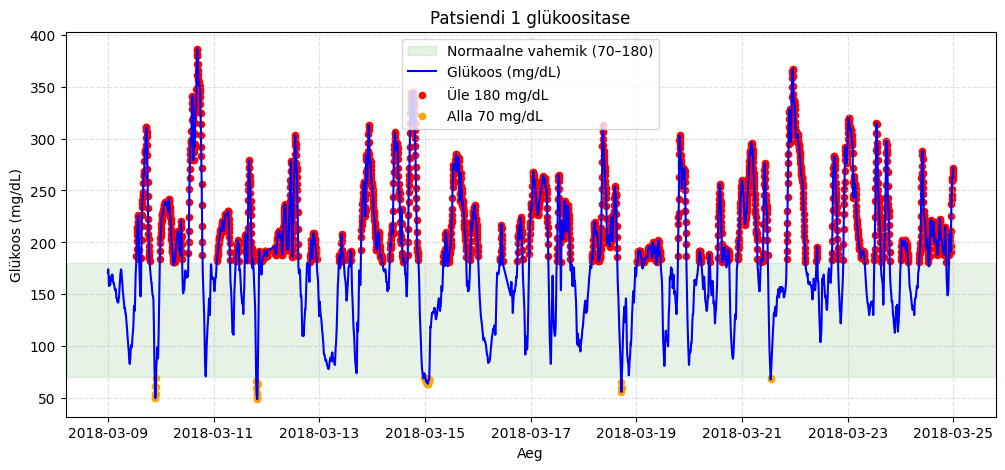

hour
0     4.812834
1     6.111111
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.555556
13    0.555556
14    0.000000
15    0.000000
16    0.000000
17    2.083333
18    0.000000
19    4.166667
20    0.520833
21    3.645833
22    0.000000
23    0.520833
Name: is_low, dtype: float64


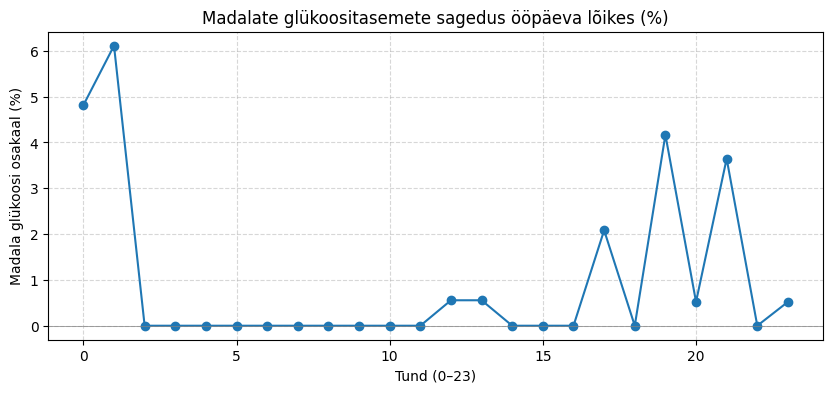

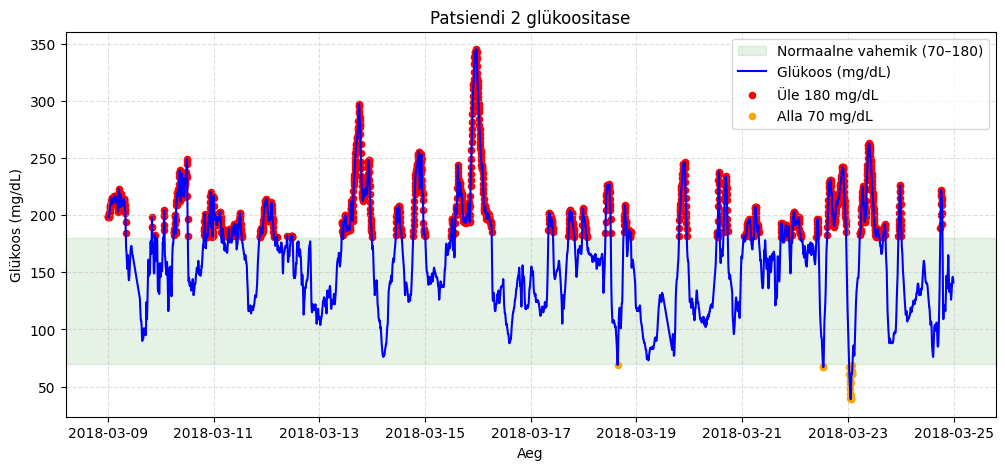

hour
0     2.604167
1     6.250000
2     1.041667
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    1.775148
13    0.000000
14    0.000000
15    0.555556
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
Name: is_low, dtype: float64


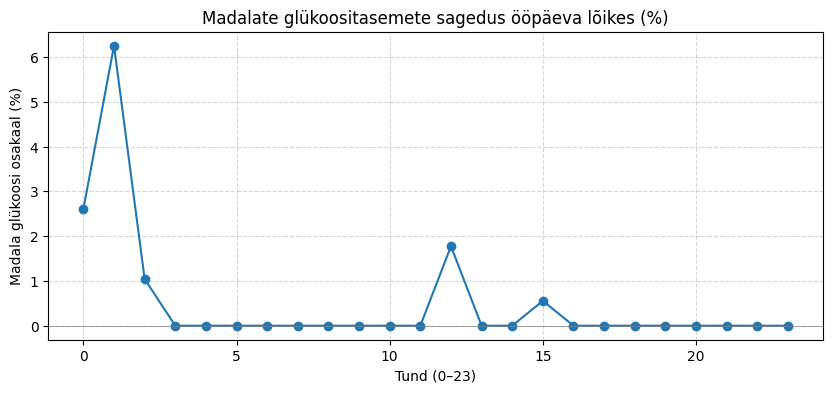

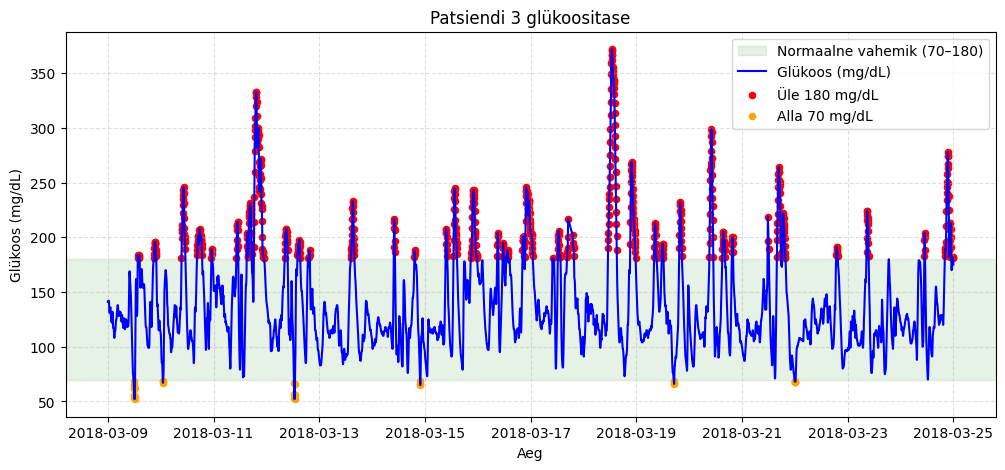

hour
0     2.083333
1     1.041667
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    2.116402
12    5.235602
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    1.657459
18    0.000000
19    0.000000
20    0.000000
21    1.562500
22    0.000000
23    1.041667
Name: is_low, dtype: float64


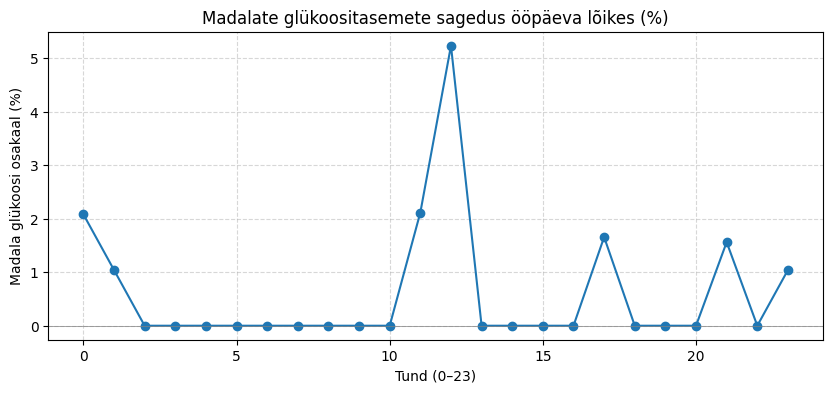

Patsiendil 4 pole andmeid vahemikus 2018-03-09–2018-03-25.
Series([], Name: is_low, dtype: float64)


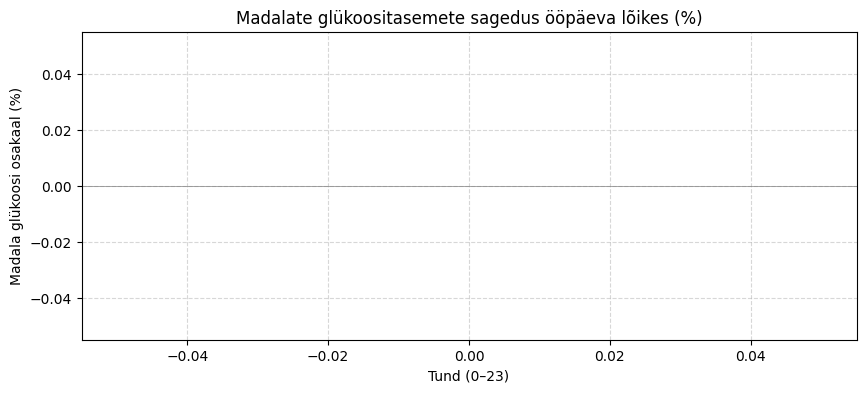

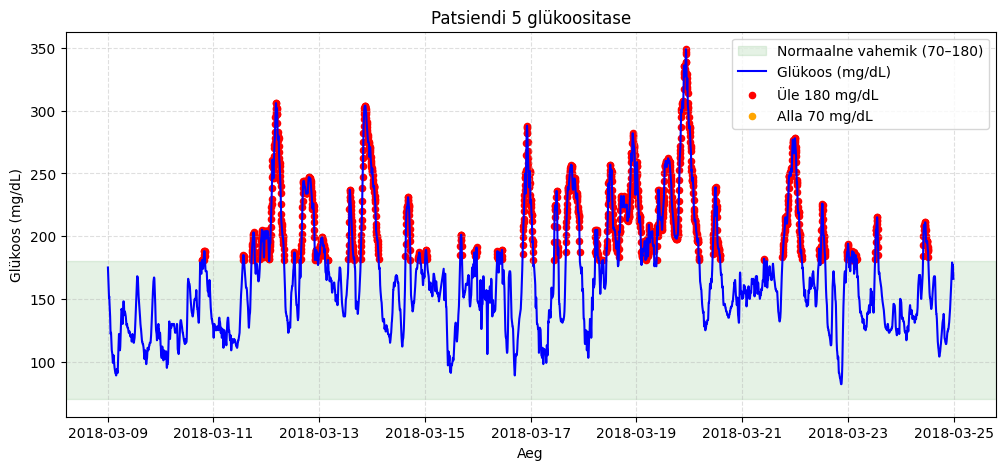

hour
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
Name: is_low, dtype: float64


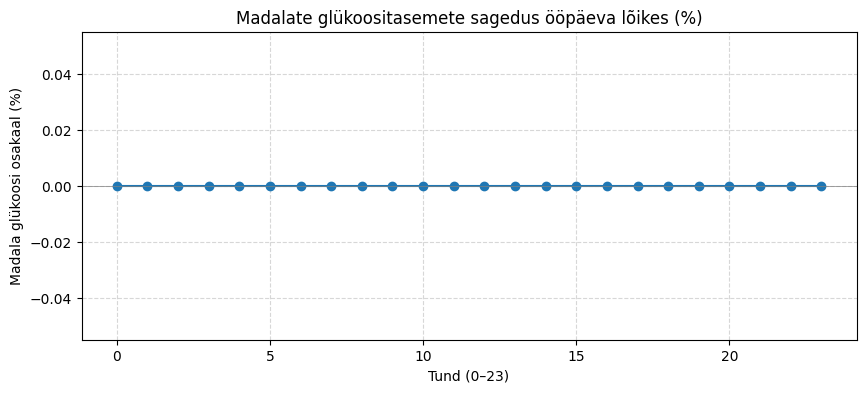

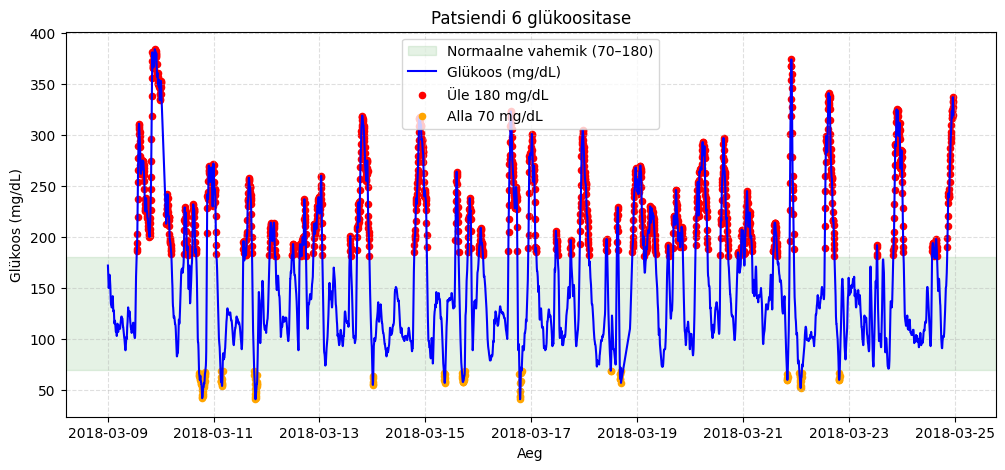

hour
0      2.717391
1      2.777778
2      4.812834
3      5.729167
4      0.520833
5      0.000000
6      0.000000
7      0.000000
8      3.645833
9      0.520833
10     0.000000
11     0.000000
12     1.041667
13     0.000000
14     0.000000
15     0.000000
16     5.820106
17    10.555556
18    13.888889
19    18.888889
20     3.825137
21     0.000000
22     0.000000
23     0.000000
Name: is_low, dtype: float64


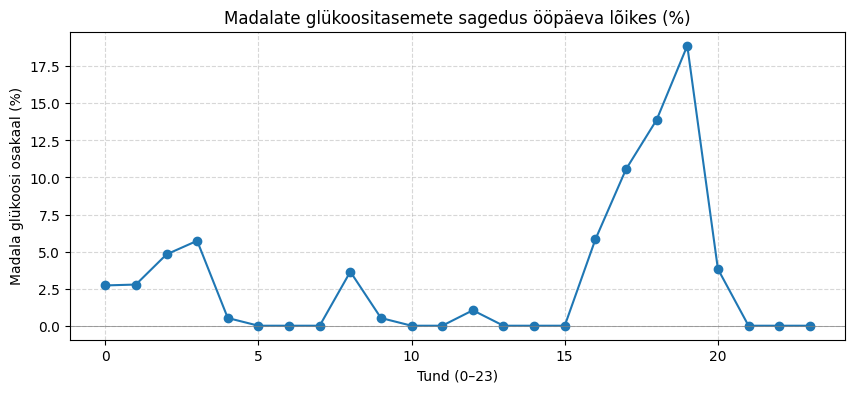

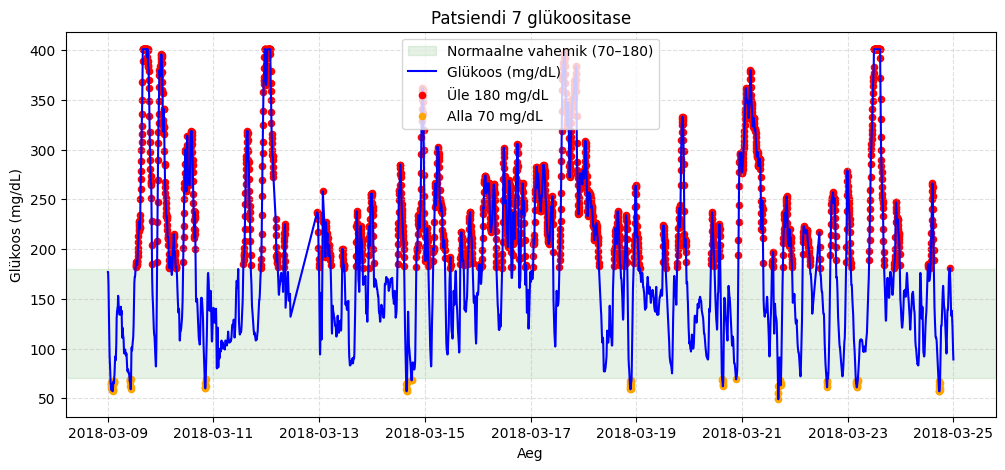

hour
0     0.000000
1     4.812834
2     5.882353
3     2.185792
4     3.684211
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     1.176471
10    3.888889
11    0.000000
12    0.000000
13    0.000000
14    3.333333
15    6.666667
16    2.777778
17    8.333333
18    0.555556
19    0.000000
20    3.888889
21    6.111111
22    0.000000
23    0.000000
Name: is_low, dtype: float64


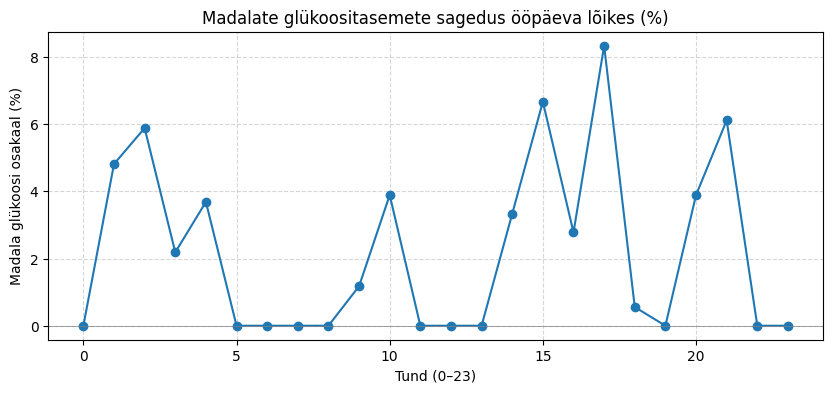

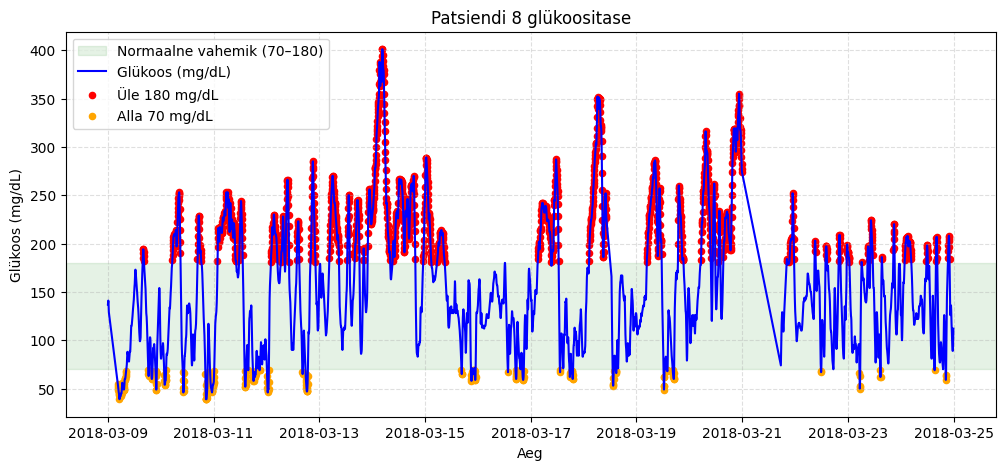

hour
0      7.471264
1      4.166667
2      3.571429
3      0.000000
4      3.448276
5      9.444444
6      6.666667
7      6.666667
8      2.222222
9      0.000000
10     4.624277
11     1.190476
12     2.906977
13     6.666667
14    10.000000
15     1.111111
16     6.666667
17     8.108108
18    17.187500
19     5.208333
20    14.062500
21     9.375000
22    10.416667
23     6.250000
Name: is_low, dtype: float64


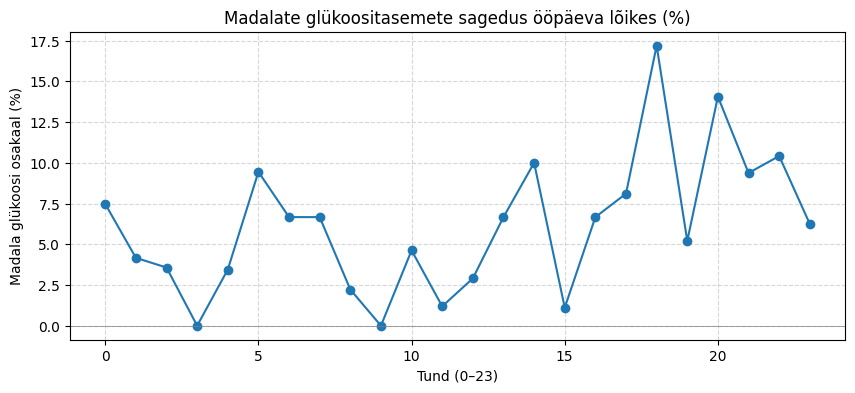

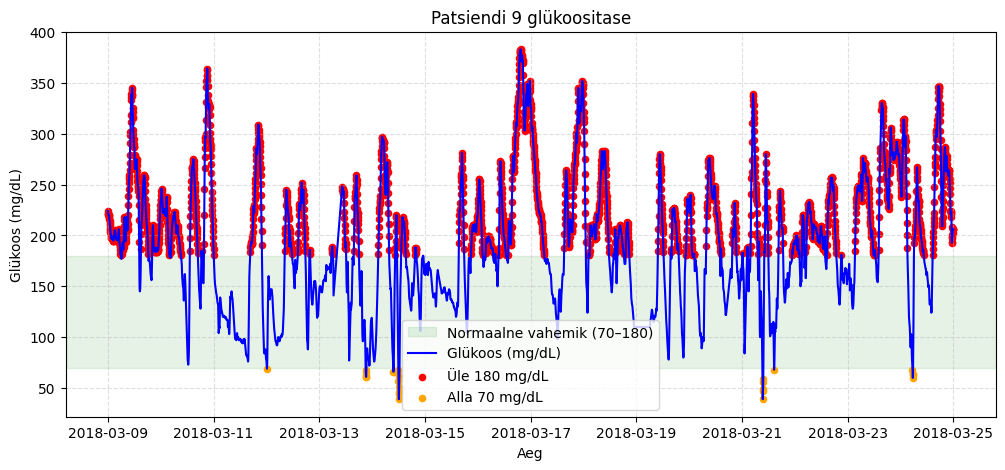

hour
0     0.555556
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     2.222222
6     0.000000
7     0.000000
8     0.000000
9     3.888889
10    0.000000
11    1.041667
12    2.604167
13    0.000000
14    0.543478
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    2.604167
22    0.000000
23    0.000000
Name: is_low, dtype: float64


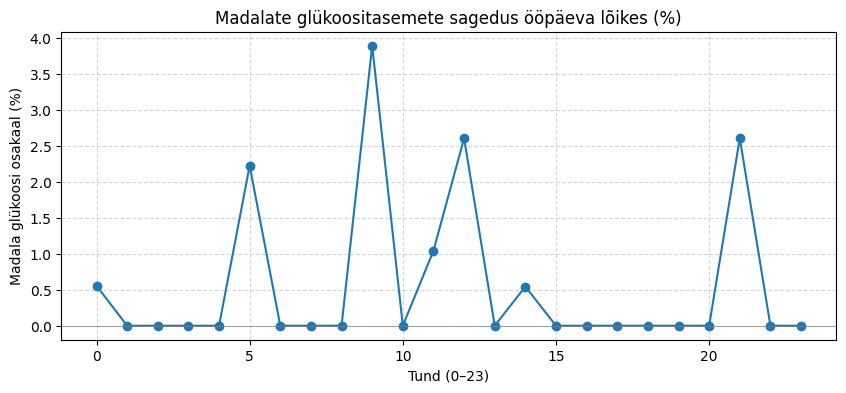

Patsiendil 10 pole andmeid vahemikus 2018-03-09–2018-03-25.
Series([], Name: is_low, dtype: float64)


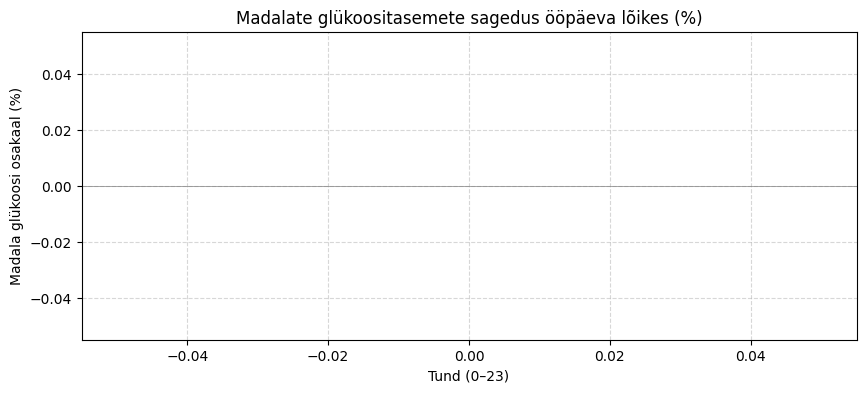

Patsiendil 11 pole andmeid vahemikus 2018-03-09–2018-03-25.
Series([], Name: is_low, dtype: float64)


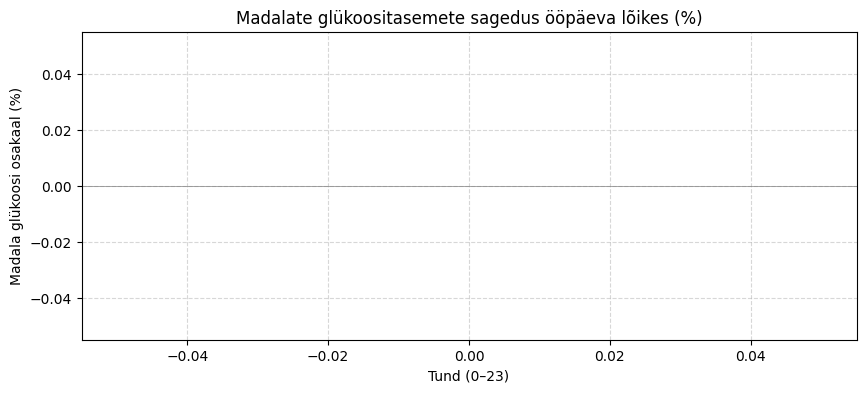

Patsiendil 12 pole andmeid vahemikus 2018-03-09–2018-03-25.
Series([], Name: is_low, dtype: float64)


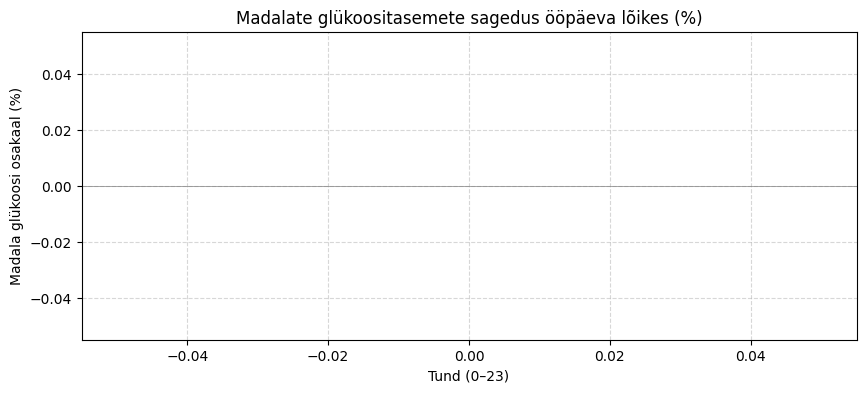

Patsiendil 13 pole andmeid vahemikus 2018-03-09–2018-03-25.
Series([], Name: is_low, dtype: float64)


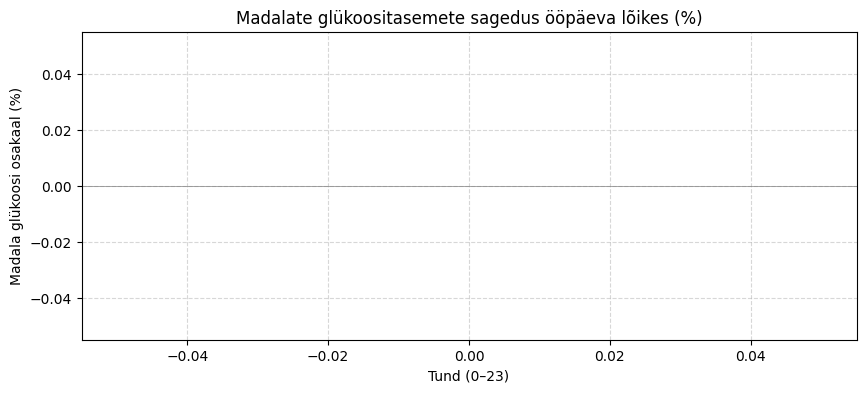

Patsiendil 14 pole andmeid vahemikus 2018-03-09–2018-03-25.
Series([], Name: is_low, dtype: float64)


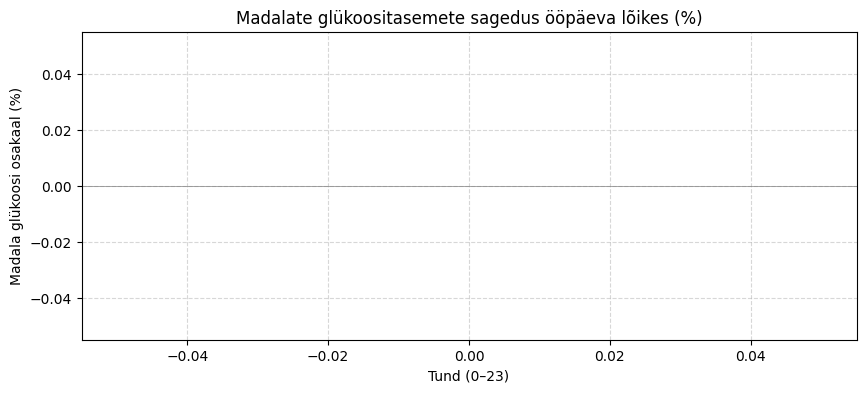

In [67]:
for i in range(15):
  #sisesta patsiendi id
  pt = i

  df['DataDtTm'] = pd.to_datetime(df['DataDtTm'], format='%d%b%y:%H:%M:%S')

  #sisesta kuupäeva vahemik millal tahad tulemusi vaadata
  start_date = '2018-03-09'
  end_date = '2018-03-25'

  #teeme subseti, kus võtame patseindi id ja kuupäevade järgi andmed
  subset = df[
      (df['PtID'] == pt) &
      (df['DataDtTm'].between(start_date, end_date))
  ].copy()

  #arvutused
  subset['CGM_mmol'] = subset['CGM'] / 18
  subset['date'] = subset['DataDtTm'].dt.date
  subset['hour'] = subset['DataDtTm'].dt.hour
  subset['minute'] = subset['DataDtTm'].dt.minute
  subset['time_of_day'] = subset['hour'] + subset['minute']/60
  subset['is_low'] = subset['CGM'] < 70  # või subset['CGM_mmol'] < 3.9


  if subset.empty:
      print(f"Patsiendil {pt} pole andmeid vahemikus {start_date}–{end_date}.")
  else:
    plt.figure(figsize=(12,5))

    # toonitud tsoonid (70–180 mg/dL norm vahemik)
    plt.axhspan(70, 180, color='green', alpha=0.1, label='Normaalne vahemik (70–180)')

    # joon
    plt.plot(subset['DataDtTm'], subset['CGM'], color='blue', label='Glükoos (mg/dL)')

    # punased punktid: liiga kõrge
    plt.scatter(subset['DataDtTm'][subset['CGM'] > 180],
                subset['CGM'][subset['CGM'] > 180],
                color='red', s=20, label='Üle 180 mg/dL')

    # oranžid punktid: liiga madal
    plt.scatter(subset['DataDtTm'][subset['CGM'] < 70],
                subset['CGM'][subset['CGM'] < 70],
                color='orange', s=20, label='Alla 70 mg/dL')

    plt.title(f'Patsiendi {pt} glükoositase')
    plt.xlabel('Aeg')
    plt.ylabel('Glükoos (mg/dL)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.show()

  if subset.empty:
      print(f"Patsiendil {pt} pole andmeid vahemikus {start_date}–{end_date}.")
  else:
    # mitu korda tunnis on väärtus madal
    hourly_low = (
        subset.groupby('hour')['is_low']
        .mean() * 100  # protsent tunnis
    )
    print(hourly_low)

    plt.figure(figsize=(10,4))
    plt.plot(hourly_low.index, hourly_low.values, marker='o')
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.title('Madalate glükoositasemete sagedus ööpäeva lõikes (%)')
    plt.xlabel('Tund (0–23)')
    plt.ylabel('Madala glükoosi osakaal (%)')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


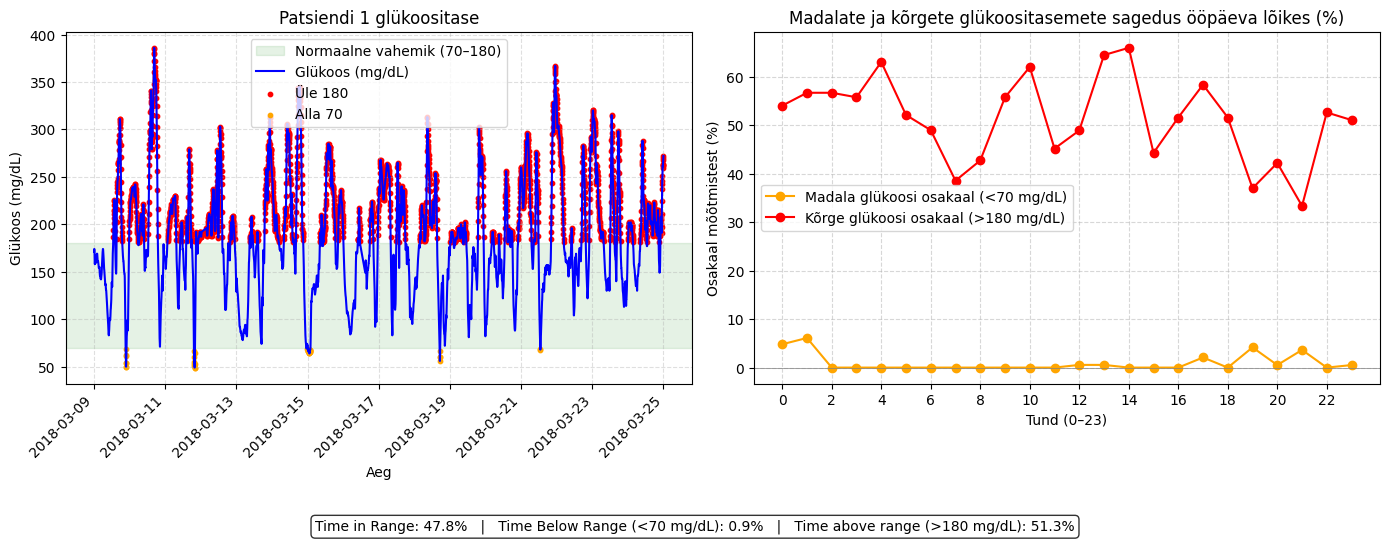

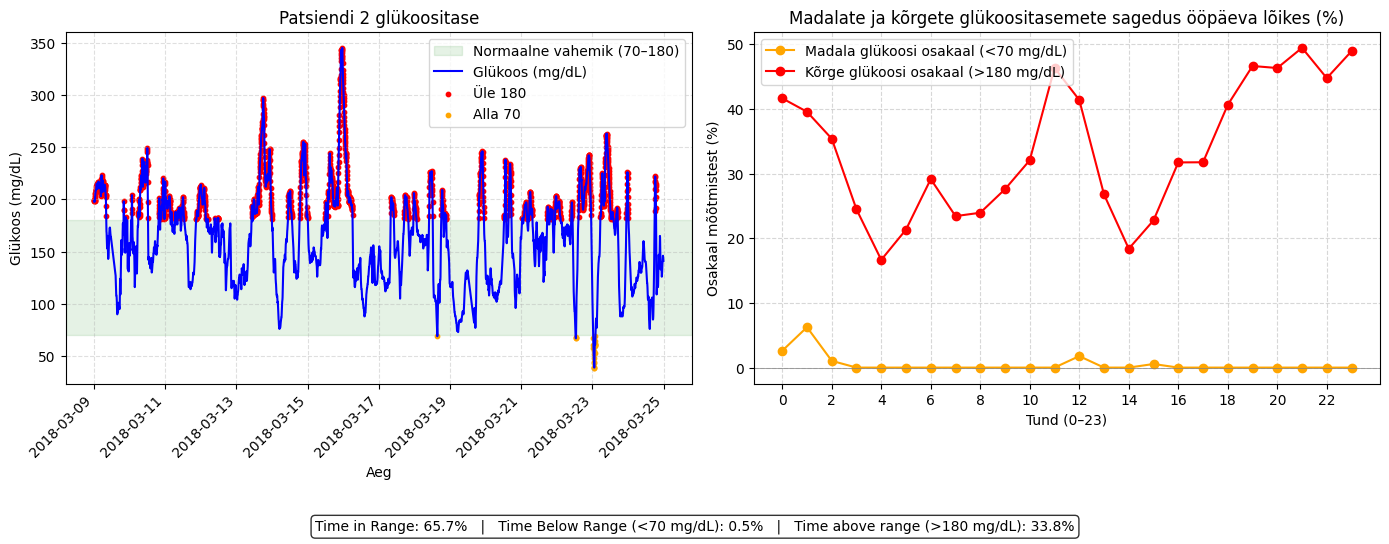

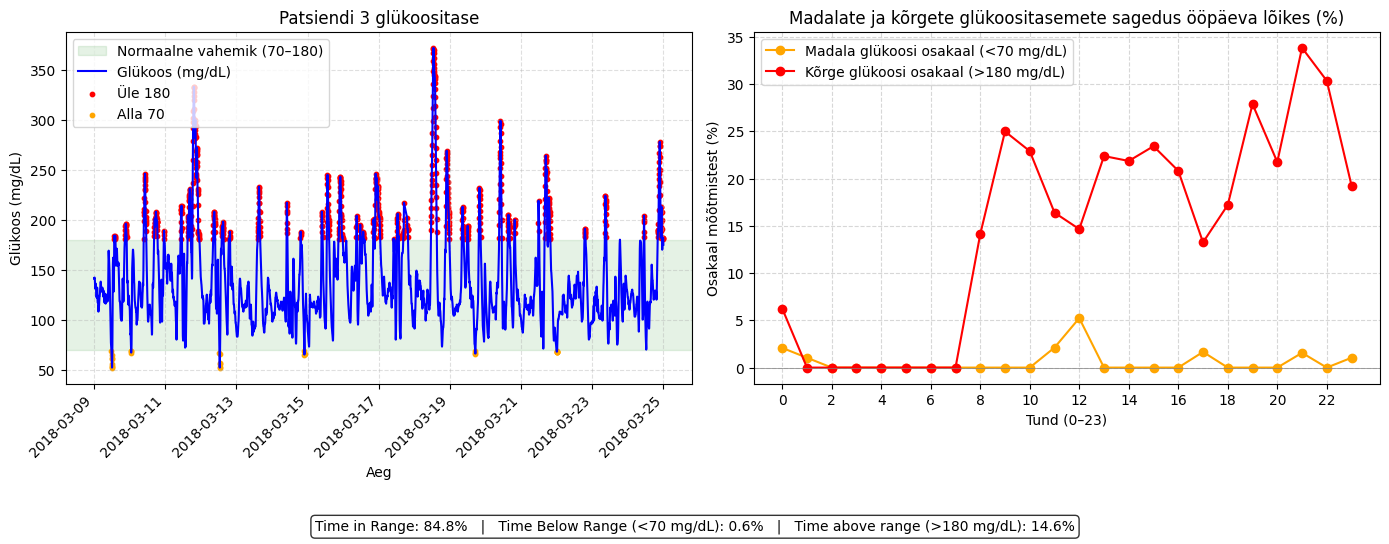


Patsiendil 4 pole andmeid vahemikus 2018-03-09–2018-03-25.


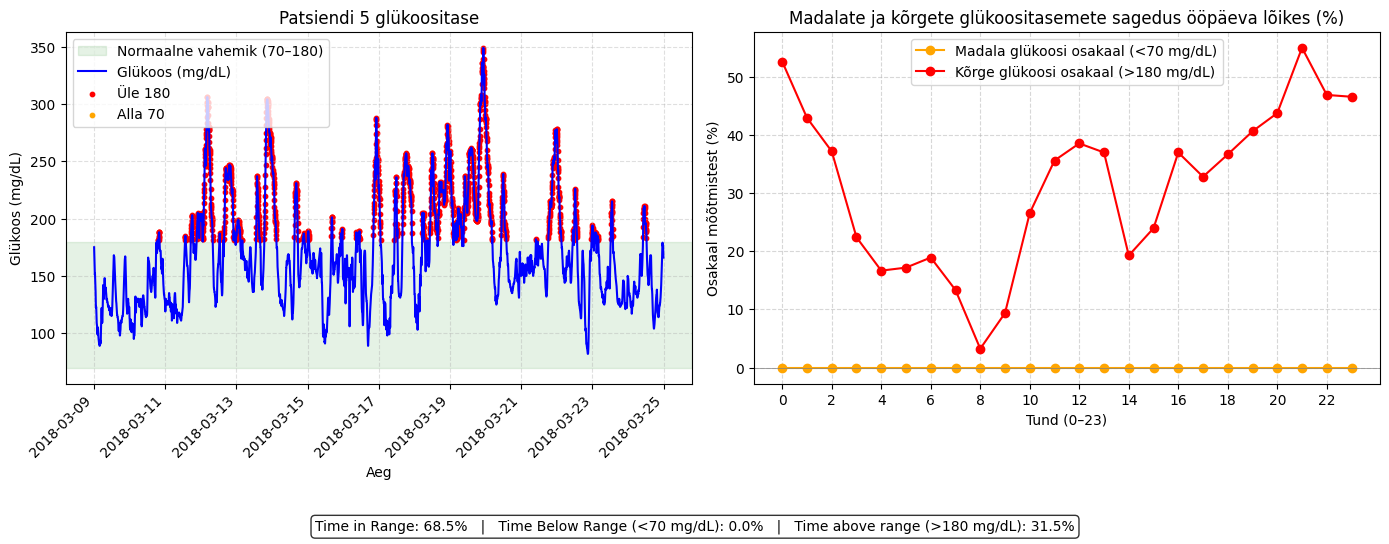

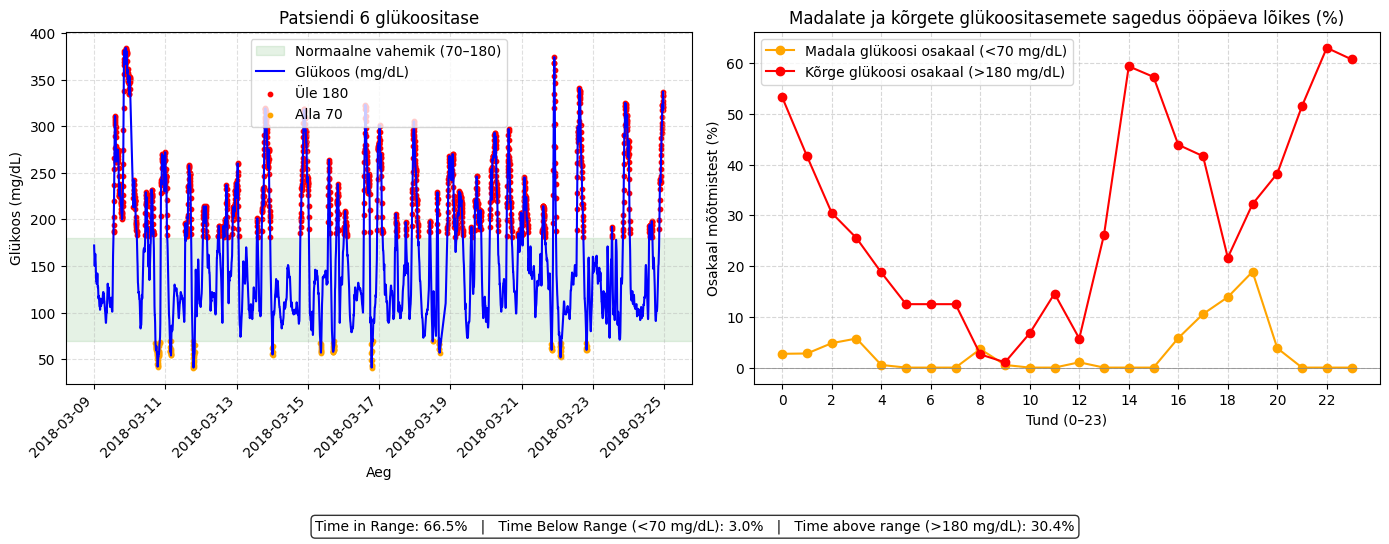

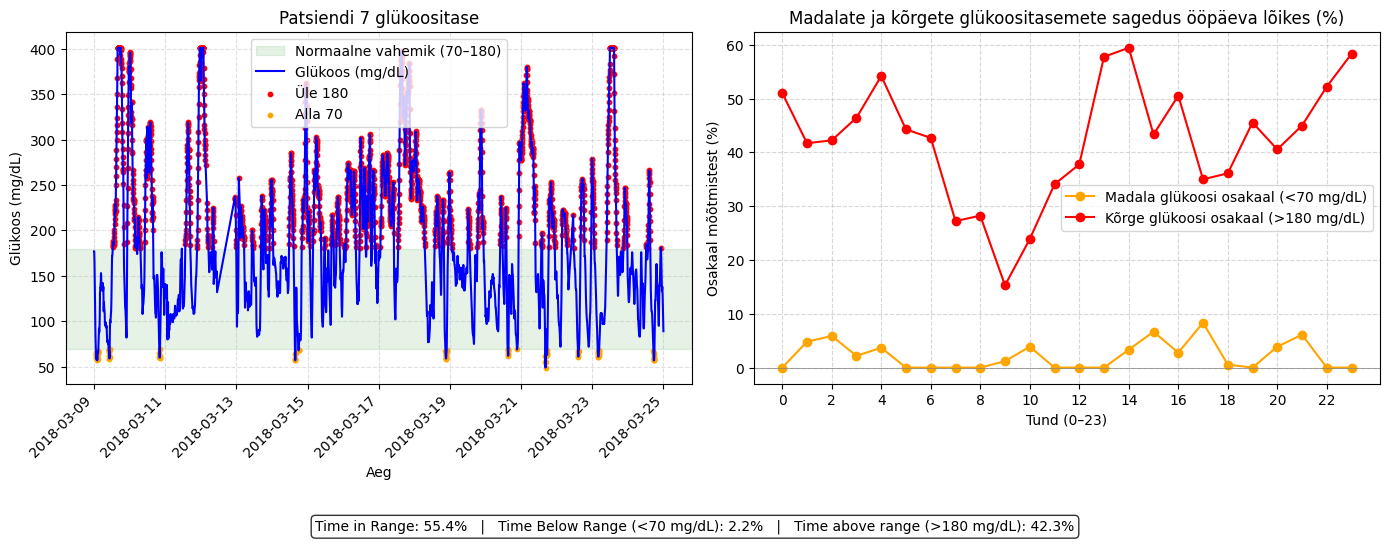

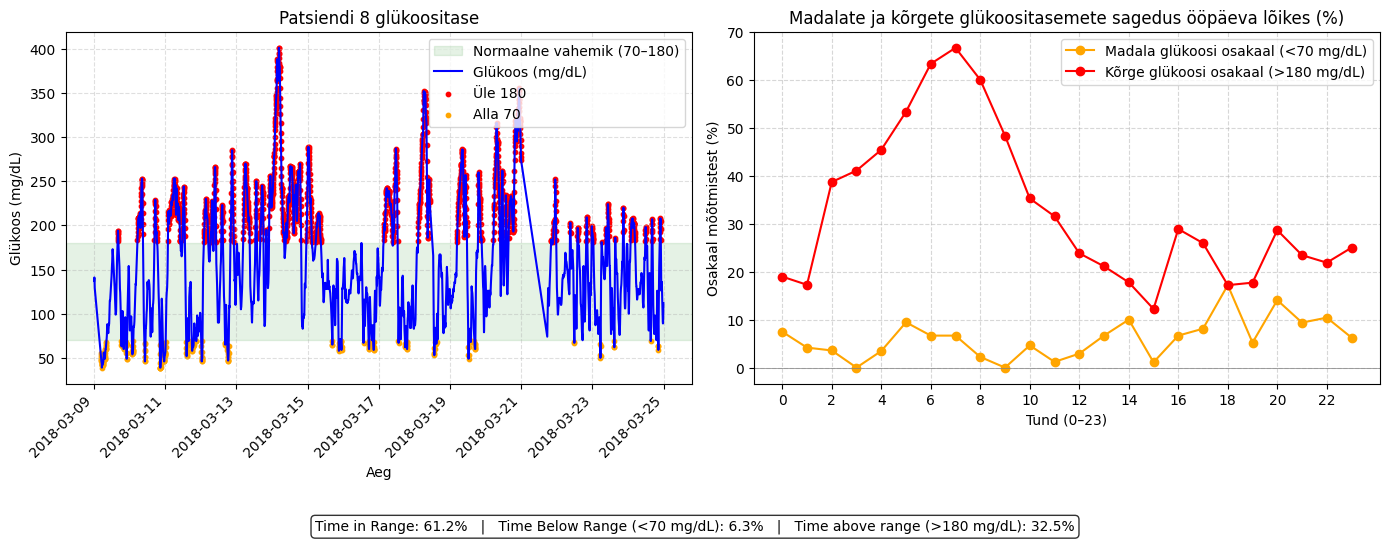

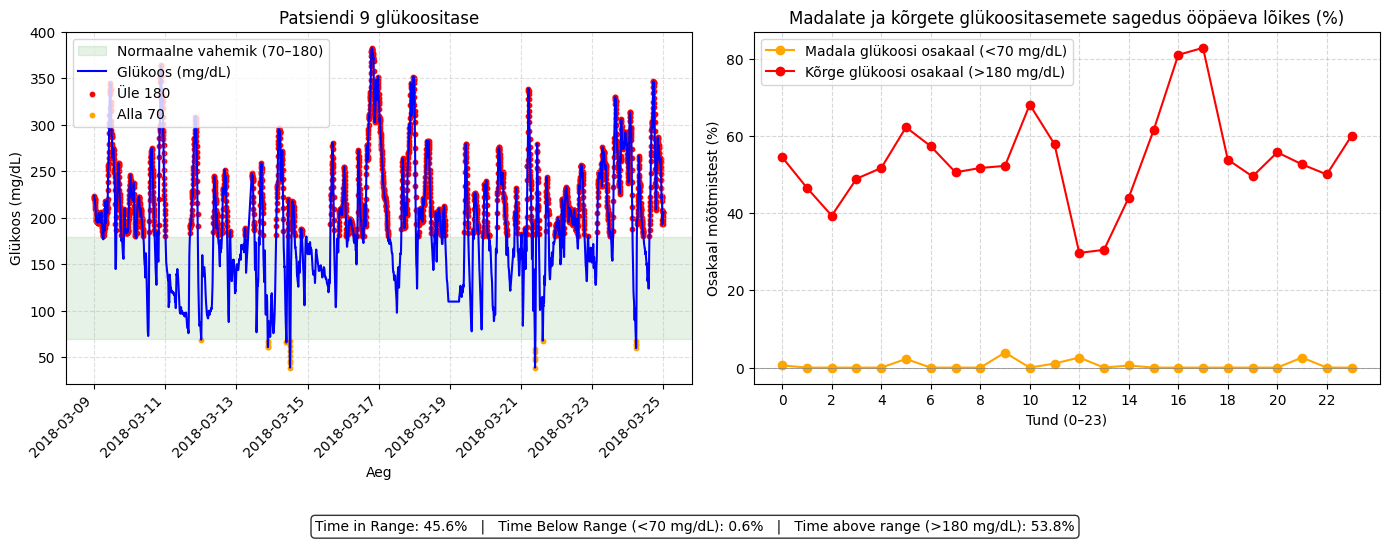


Patsiendil 10 pole andmeid vahemikus 2018-03-09–2018-03-25.
Patsiendil 11 pole andmeid vahemikus 2018-03-09–2018-03-25.
Patsiendil 12 pole andmeid vahemikus 2018-03-09–2018-03-25.
Patsiendil 13 pole andmeid vahemikus 2018-03-09–2018-03-25.
Patsiendil 14 pole andmeid vahemikus 2018-03-09–2018-03-25.


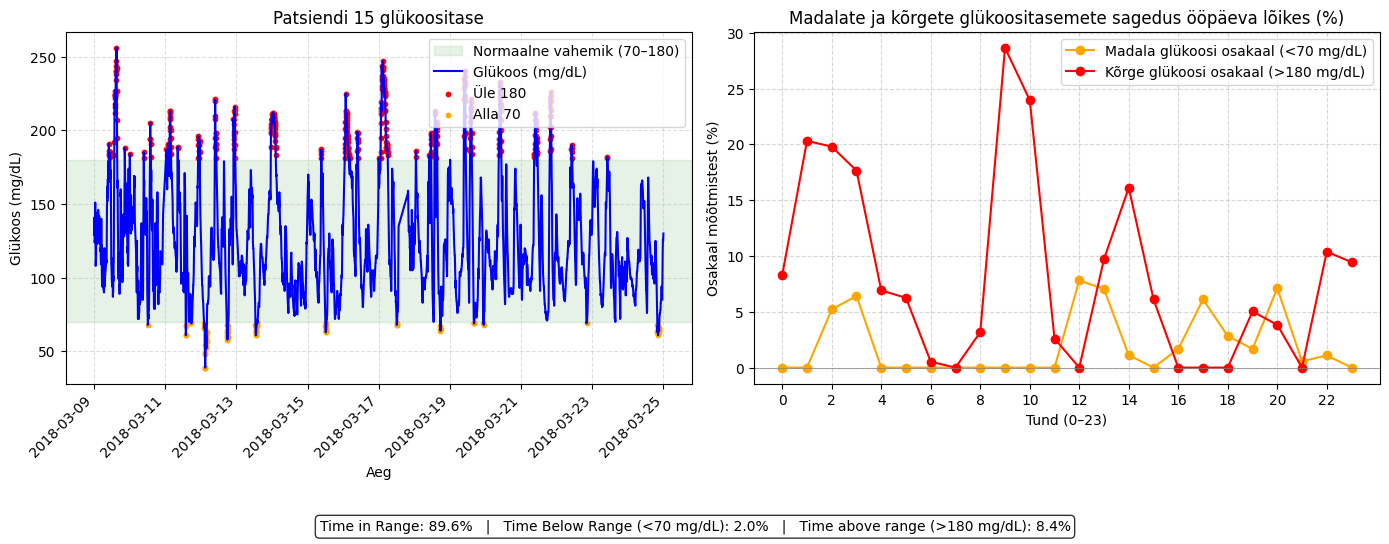

In [79]:
# teisendame aja datetime'iks
df['DataDtTm'] = pd.to_datetime(df['DataDtTm'], format='%d%b%y:%H:%M:%S')

#määra start date
start_date = '2018-03-09'
end_date = '2018-03-25'

for pt in range(1, 16):  # patsiendid 1–15
    # vali patsiendi ja kuupäeva vahemiku andmed
    subset = df[
        (df['PtID'] == pt) &
        (df['DataDtTm'].between(start_date, end_date))
    ].copy()

    if subset.empty:
        print(f"Patsiendil {pt} pole andmeid vahemikus {start_date}–{end_date}.")
        continue

    # arvutused
    subset['CGM_mmol'] = subset['CGM'] / 18
    subset['hour'] = subset['DataDtTm'].dt.hour
    subset['is_low'] = subset['CGM'] < 70

    # mitu korda tunnis on väärtus madal
    hourly_low = subset.groupby('hour')['is_low'].mean() * 100

    # --- joonis kahe alamgraafikuga ---
    fig, axes = plt.subplots(1, 2, figsize=(14,5))

    # Vasak: glükoositrend ajas
    ax1 = axes[0]
    ax1.axhspan(70, 180, color='green', alpha=0.1, label='Normaalne vahemik (70–180)')
    ax1.plot(subset['DataDtTm'], subset['CGM'], color='blue', label='Glükoos (mg/dL)')
    ax1.scatter(subset['DataDtTm'][subset['CGM'] > 180], subset['CGM'][subset['CGM'] > 180],
                color='red', s=10, label='Üle 180')
    ax1.scatter(subset['DataDtTm'][subset['CGM'] < 70], subset['CGM'][subset['CGM'] < 70],
                color='orange', s=10, label='Alla 70')
    ax1.set_title(f'Patsiendi {pt} glükoositase')
    ax1.set_xlabel('Aeg')
    ax1.set_ylabel('Glükoos (mg/dL)')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.4)
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')


    TIR = (subset['CGM'].between(70,180)).mean() * 100
    TBR = (subset['CGM'] < 70).mean() * 100
    TAR = (subset['CGM'] > 180).mean() * 100
    # Lisa tekst kogu joonise alla (fig tasemel)
    fig.text(0.5, -0.05,
            f"Time in Range: {TIR:.1f}%   |   Time Below Range (<70 mg/dL): {TBR:.1f}%   |   Time above range (>180 mg/dL): {TAR:.1f}%",
            ha='center', va='top', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


    ax2 = axes[1]

    # arvutame ka kõrgete väärtuste (TAR) protsendi tunnis
    hourly_high = subset.groupby('hour')['CGM'].apply(lambda x: (x > 180).mean() * 100)

    # joonista mõlemad
    ax2.plot(hourly_low.index, hourly_low.values, marker='o', color='orange', label='Madala glükoosi osakaal (<70 mg/dL)')
    ax2.plot(hourly_high.index, hourly_high.values, marker='o', color='red', label='Kõrge glükoosi osakaal (>180 mg/dL)')

    # lisa abijoon
    ax2.axhline(0, color='gray', linewidth=0.5)

    # sätted
    ax2.set_title('Madalate ja kõrgete glükoositasemete sagedus ööpäeva lõikes (%)')
    ax2.set_xlabel('Tund (0–23)')
    ax2.set_ylabel('Osakaal mõõtmistest (%)')
    ax2.set_xticks(range(0,24,2))
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax2.legend()



    plt.tight_layout()
    plt.show()
    print()


Patsiendil 16 pole andmeid vahemikus 2018-03-09–2018-03-25.


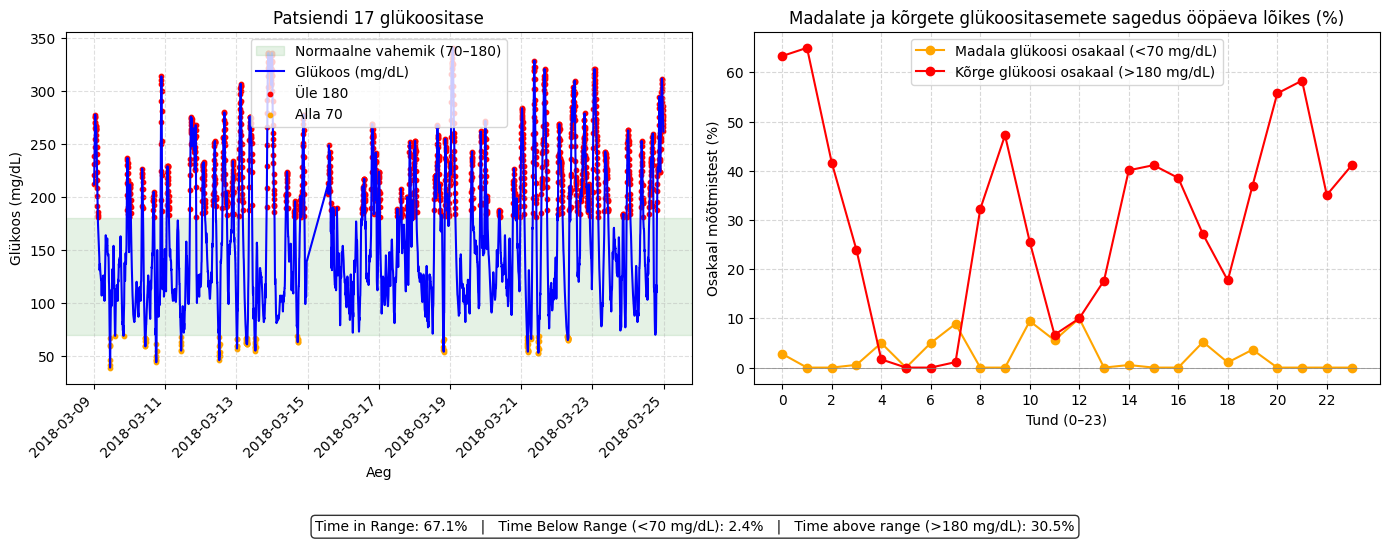

Patsiendil 18 pole andmeid vahemikus 2018-03-09–2018-03-25.
Patsiendil 19 pole andmeid vahemikus 2018-03-09–2018-03-25.


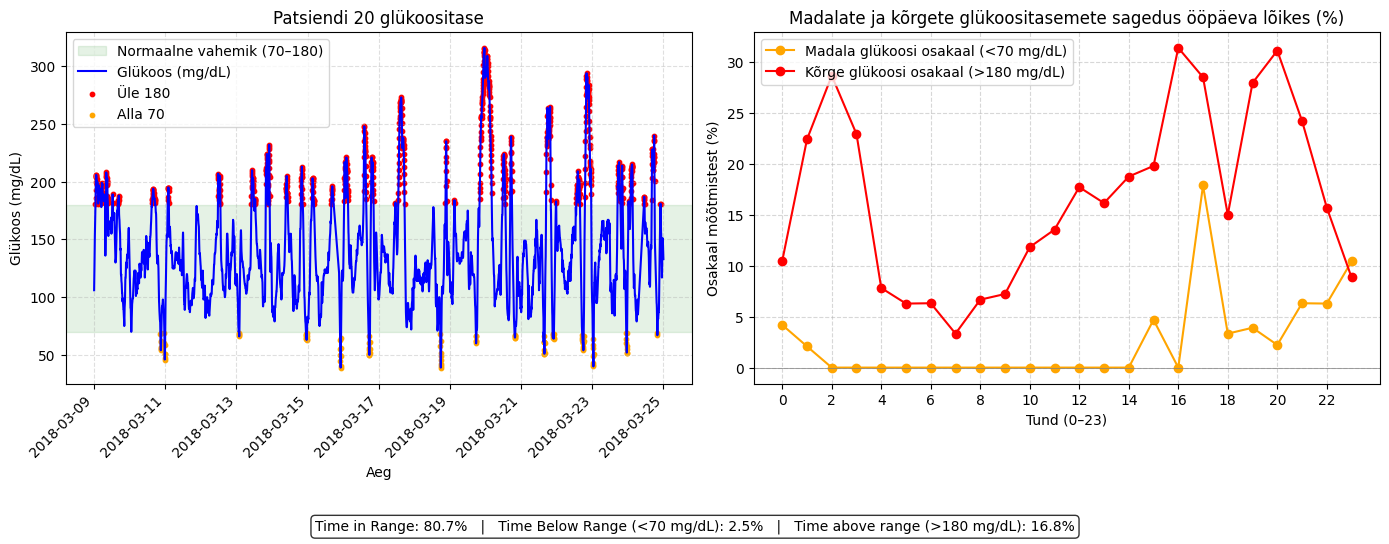

Patsiendil 21 pole andmeid vahemikus 2018-03-09–2018-03-25.
Patsiendil 22 pole andmeid vahemikus 2018-03-09–2018-03-25.


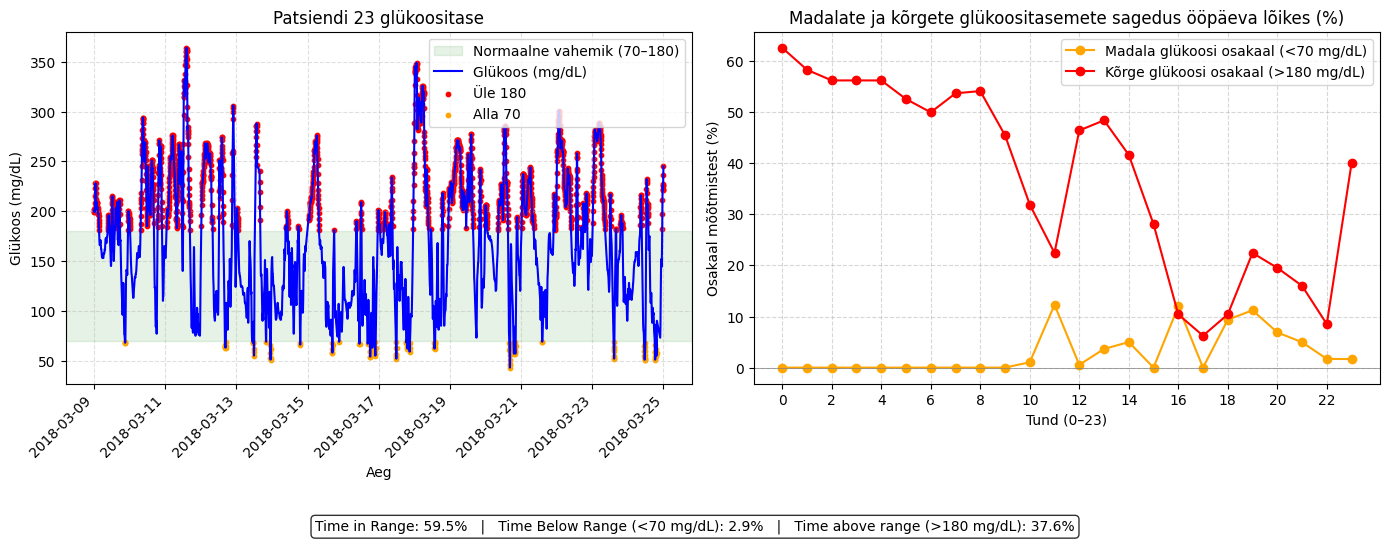

Patsiendil 24 pole andmeid vahemikus 2018-03-09–2018-03-25.
Patsiendil 25 pole andmeid vahemikus 2018-03-09–2018-03-25.


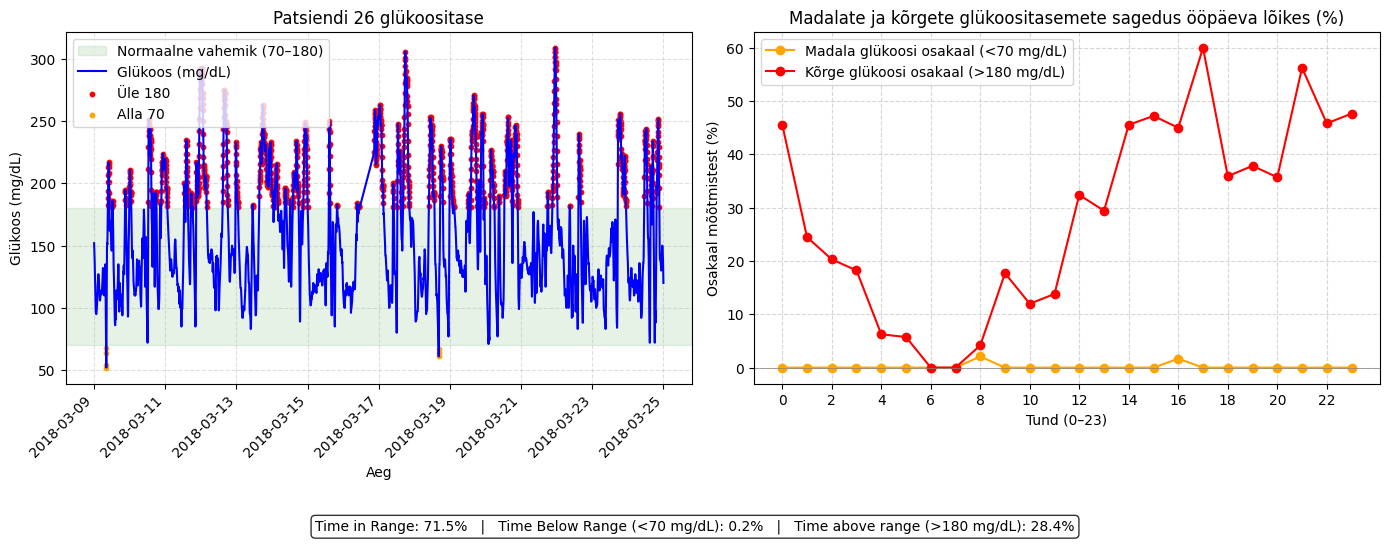

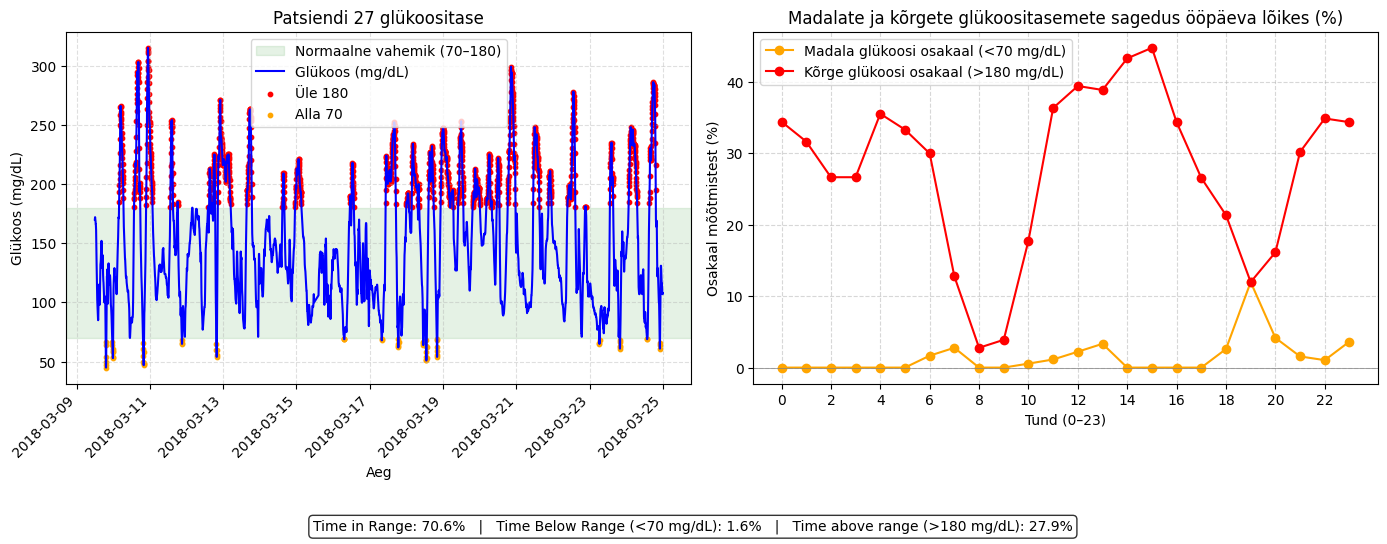

Patsiendil 28 pole andmeid vahemikus 2018-03-09–2018-03-25.


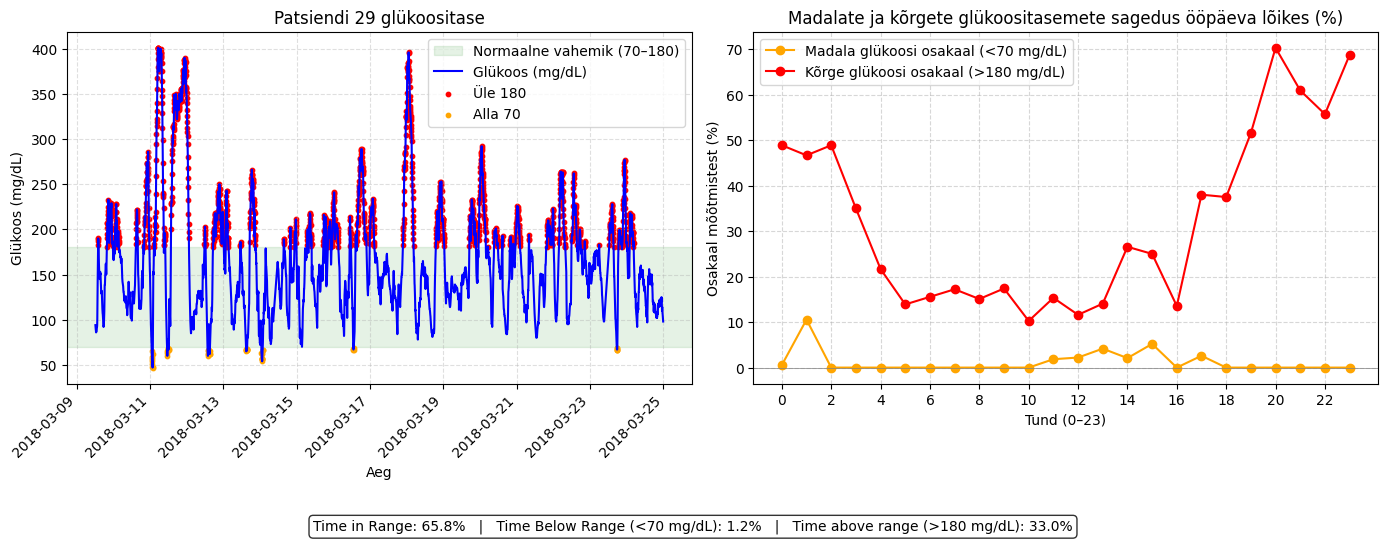

In [80]:
df['DataDtTm'] = pd.to_datetime(df['DataDtTm'], format='%d%b%y:%H:%M:%S')

#määra start date
start_date = '2018-03-09'
end_date = '2018-03-25'

for pt in range(16, 30):  # patsiendid 16–30
    # vali patsiendi ja kuupäeva vahemiku andmed
    subset = df[
        (df['PtID'] == pt) &
        (df['DataDtTm'].between(start_date, end_date))
    ].copy()

    if subset.empty:
        print(f"Patsiendil {pt} pole andmeid vahemikus {start_date}–{end_date}.")
        continue

    # arvutused
    subset['CGM_mmol'] = subset['CGM'] / 18
    subset['hour'] = subset['DataDtTm'].dt.hour
    subset['is_low'] = subset['CGM'] < 70

    # mitu korda tunnis on väärtus madal
    hourly_low = subset.groupby('hour')['is_low'].mean() * 100

    # --- joonis kahe alamgraafikuga ---
    fig, axes = plt.subplots(1, 2, figsize=(14,5))

    # Vasak: glükoositrend ajas
    ax1 = axes[0]
    ax1.axhspan(70, 180, color='green', alpha=0.1, label='Normaalne vahemik (70–180)')
    ax1.plot(subset['DataDtTm'], subset['CGM'], color='blue', label='Glükoos (mg/dL)')
    ax1.scatter(subset['DataDtTm'][subset['CGM'] > 180], subset['CGM'][subset['CGM'] > 180],
                color='red', s=10, label='Üle 180')
    ax1.scatter(subset['DataDtTm'][subset['CGM'] < 70], subset['CGM'][subset['CGM'] < 70],
                color='orange', s=10, label='Alla 70')
    ax1.set_title(f'Patsiendi {pt} glükoositase')
    ax1.set_xlabel('Aeg')
    ax1.set_ylabel('Glükoos (mg/dL)')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.4)
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')


    TIR = (subset['CGM'].between(70,180)).mean() * 100
    TBR = (subset['CGM'] < 70).mean() * 100
    TAR = (subset['CGM'] > 180).mean() * 100
    # Lisa tekst kogu joonise alla (fig tasemel)
    fig.text(0.5, -0.05,
            f"Time in Range: {TIR:.1f}%   |   Time Below Range (<70 mg/dL): {TBR:.1f}%   |   Time above range (>180 mg/dL): {TAR:.1f}%",
            ha='center', va='top', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


    ax2 = axes[1]

    # arvutame ka kõrgete väärtuste (TAR) protsendi tunnis
    hourly_high = subset.groupby('hour')['CGM'].apply(lambda x: (x > 180).mean() * 100)

    # joonista mõlemad
    ax2.plot(hourly_low.index, hourly_low.values, marker='o', color='orange', label='Madala glükoosi osakaal (<70 mg/dL)')
    ax2.plot(hourly_high.index, hourly_high.values, marker='o', color='red', label='Kõrge glükoosi osakaal (>180 mg/dL)')

    # lisa abijoon
    ax2.axhline(0, color='gray', linewidth=0.5)

    # sätted
    ax2.set_title('Madalate ja kõrgete glükoositasemete sagedus ööpäeva lõikes (%)')
    ax2.set_xlabel('Tund (0–23)')
    ax2.set_ylabel('Osakaal mõõtmistest (%)')
    ax2.set_xticks(range(0,24,2))
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax2.legend()



    plt.tight_layout()
    plt.show()
